## Working with ABS data to create a base dataset for demographic analysis and prediction of homelessness risk. 
## Table 1.12 from ABS 2021 dataset is being used in this code block. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
file_path="base1.xlsx"
df=pd.read_excel(file_path,sheet_name="Sheet2")

In [3]:
df.head()

,gender,age_group,homelessness_type,count
0,Male,Under 12,"PEOPLE LIVING IN IMPROVISED DWELLINGS, TENTS, ...",116
1,Male,12–18,"PEOPLE LIVING IN IMPROVISED DWELLINGS, TENTS, ...",89
2,Male,19–24,"PEOPLE LIVING IN IMPROVISED DWELLINGS, TENTS, ...",245
3,Male,25–34,"PEOPLE LIVING IN IMPROVISED DWELLINGS, TENTS, ...",735
4,Male,35–44,"PEOPLE LIVING IN IMPROVISED DWELLINGS, TENTS, ...",1153


age_group
12–18          22484
19–24          31195
25–34          43077
35–44          26932
45–54          23732
55–64          17803
65–74          10866
75 and over     4735
Under 12       34829
Name: count, dtype: int64


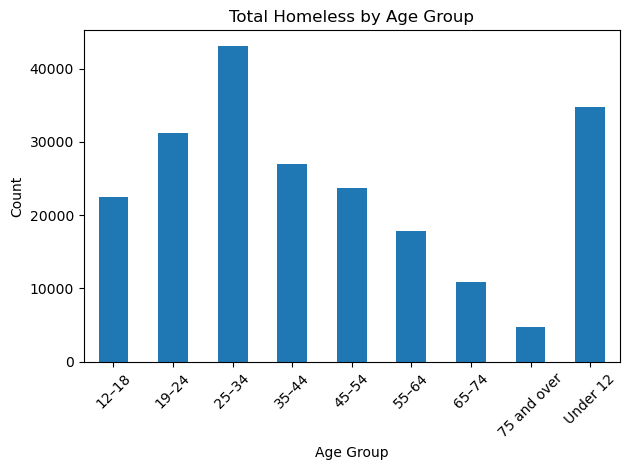

In [4]:
# Filter out 'TOTAL HOMELESS PERSONS' before analysis
df_filtered = df[df["homelessness_type"].str.strip().str.upper() != "TOTAL HOMELESS PERSONS"]

# Now group and plot
age_totals = df_filtered.groupby("age_group")["count"].sum().sort_index()
print(age_totals)

# Optional: plot
import matplotlib.pyplot as plt

age_totals.plot(kind="bar", title="Total Homeless by Age Group", ylabel="Count", xlabel="Age Group")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



In [5]:
# Step 1: Normalize column
df["homelessness_type_clean"] = df["homelessness_type"].str.strip().str.upper()

# Step 2: Separate total rows
df_total = df[df["homelessness_type_clean"] == "TOTAL HOMELESS PERSONS"]

# Step 3: Sum of operational groups only
df_operational = df[df["homelessness_type_clean"] != "TOTAL HOMELESS PERSONS"]

# Step 4: Aggregate both sets
operational_sum = df_operational.groupby(["gender", "age_group"])["count"].sum().reset_index(name="operational_sum")
total_reported = df_total.groupby(["gender", "age_group"])["count"].sum().reset_index(name="total_reported")

# Step 5: Merge and compare
comparison = pd.merge(operational_sum, total_reported, on=["gender", "age_group"], how="inner")
comparison["difference"] = comparison["total_reported"] - comparison["operational_sum"]
comparison["matches"] = comparison["difference"] == 0

In [6]:
comparison.head(20)

,gender,age_group,operational_sum,total_reported,difference,matches
0,Female,12–18,11207,5775,-5432,False
1,Female,19–24,14134,7850,-6284,False
2,Female,25–34,18712,11097,-7615,False
3,Female,35–44,12432,7489,-4943,False
4,Female,45–54,10547,5910,-4637,False
5,Female,55–64,7116,4146,-2970,False
6,Female,65–74,4200,2168,-2032,False
7,Female,75 and over,2169,1011,-1158,False
8,Female,Under 12,17012,8529,-8483,False
9,Male,12–18,11277,5531,-5746,False


age_group
12–18          11306
19–24          16909
25–34          25505
35–44          17080
45–54          14679
55–64          10933
65–74           6098
75 and over     2356
Under 12       17650
Name: count, dtype: int64


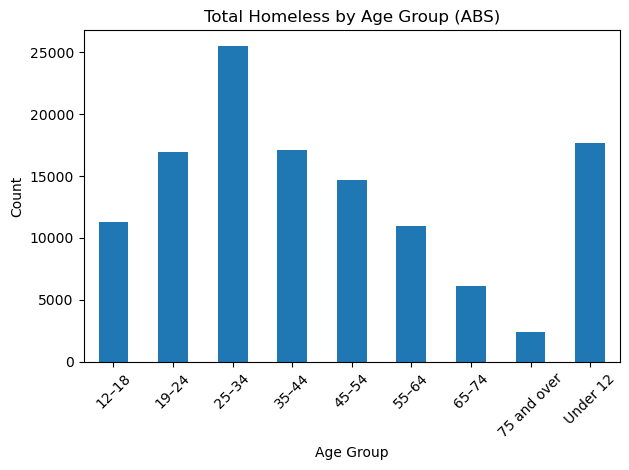

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Filter only TOTAL HOMELESS PERSONS rows
df_total_only = df[df["homelessness_type"].str.strip().str.upper() == "TOTAL HOMELESS PERSONS"]

# Step 2: Group by age_group and sum across genders (if needed)
age_totals = df_total_only.groupby("age_group")["count"].sum().sort_index()
print(age_totals)

# Step 3: Plot
age_totals.plot(kind="bar", title="Total Homeless by Age Group (ABS)", ylabel="Count", xlabel="Age Group")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


gender
Female    53975
Male      68541
Name: count, dtype: int64


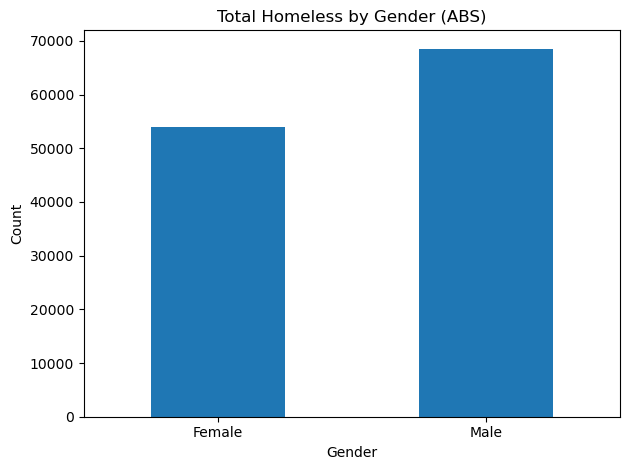

In [8]:
# Filter only TOTAL HOMELESS PERSONS
df_total_only = df[df["homelessness_type"].str.strip().str.upper() == "TOTAL HOMELESS PERSONS"]

# Group by gender and sum
gender_totals = df_total_only.groupby("gender")["count"].sum()
print(gender_totals)

# Plot
gender_totals.plot(kind="bar", title="Total Homeless by Gender (ABS)", ylabel="Count", xlabel="Gender")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [9]:
base1_m=pd.read_excel("base1.xlsx")
pop_df=pd.read_excel("population data summary.xlsx",sheet_name='Table 3',skiprows=12)

In [10]:
base1_m.head(5)

,gender,age_group,homelessness_type,count
0,Male,Under 12,"PEOPLE LIVING IN IMPROVISED DWELLINGS, TENTS, ...",116
1,Male,12–18,"PEOPLE LIVING IN IMPROVISED DWELLINGS, TENTS, ...",89
2,Male,19–24,"PEOPLE LIVING IN IMPROVISED DWELLINGS, TENTS, ...",245
3,Male,25–34,"PEOPLE LIVING IN IMPROVISED DWELLINGS, TENTS, ...",735
4,Male,35–44,"PEOPLE LIVING IN IMPROVISED DWELLINGS, TENTS, ...",1153


In [11]:
pop_df.head(5)

,0-4 years,752557,711258,1463817
0,5-9 years,814704.0,771436.0,1586138.0
1,10-14 years,816592.0,771460.0,1588051.0
2,15-19 years,749330.0,708485.0,1457812.0
3,20-24 years,806829.0,772711.0,1579539.0
4,25-29 years,886836.0,884837.0,1771676.0


In [12]:
# manually assigning column names
pop_df.columns=['age_group','Males','Females','Total']

In [13]:
pop_df=pop_df.dropna(subset=['age_group'])
pop_df=pop_df[pop_df['age_group'].astype(str).str.contains("years",na=False)]

In [14]:
# Now this age group has years written in the end, remmoving that and only keeping it like 12-18 as it in baseline
pop_df['age_group']=pop_df['age_group'].str.replace(" years","").str.strip()

In [15]:
pop_df.head(5)

,age_group,Males,Females,Total
0,5-9,814704.0,771436.0,1586138.0
1,10-14,816592.0,771460.0,1588051.0
2,15-19,749330.0,708485.0,1457812.0
3,20-24,806829.0,772711.0,1579539.0
4,25-29,886836.0,884837.0,1771676.0


In [16]:
# wide format to gender wide mapping long format
pop_df=pd.melt(pop_df,id_vars='age_group',value_vars=['Males','Females'],var_name='gender',value_name='population')

In [17]:
pop_df.head()

,age_group,gender,population
0,5-9,Males,814704.0
1,10-14,Males,816592.0
2,15-19,Males,749330.0
3,20-24,Males,806829.0
4,25-29,Males,886836.0


In [18]:
def map_to_base1_age_grp(age_range):
    try:
        start_age=int(age_range.split('-')[0])
    except:
       return None
    if start_age<12:
        return "Under 12"
    elif 12<=start_age<=18:
        return "12-18"
    elif 19<=start_age<=24:
        return "19-24"
    elif 25<=start_age<=34:
        return "25-34"
    elif 35<=start_age<=44:
        return "35-44"
    elif 45<=start_age<=54:
        return "45-54"
    elif 55<=start_age<=64:
        return "55-64"
    elif 65<=start_age<=74:
        return "65-74"
    else:
        return "75 and over"

In [19]:
pop_df['base_age_grp']=pop_df['age_group'].apply(map_to_base1_age_grp)

In [20]:
pop_df.head(5)

,age_group,gender,population,base_age_grp
0,5-9,Males,814704.0,Under 12
1,10-14,Males,816592.0,Under 12
2,15-19,Males,749330.0,12-18
3,20-24,Males,806829.0,19-24
4,25-29,Males,886836.0,25-34


In [27]:
baseline_df=pop_df.groupby(['base_age_grp','gender'])['population'].sum().reset_index()
baseline_df.columns=['age_group','gender','population']

In [28]:
baseline_df['gender']=baseline_df['gender'].replace({'Males':'Male','Females':'Female'})

In [29]:
base1_df=pd.read_excel("base1.xlsx")

In [33]:
base1_df['age_group'] = base1_df['age_group'].str.replace("–", "-").str.strip()
baseline_df['age_group'] = baseline_df['age_group'].str.replace("–", "-").str.strip()

In [34]:
base1_with_risk=base1_df.merge(baseline_df,on=['age_group','gender'],how='left')
base1_with_risk['baseline_risk']=base1_with_risk['count']/base1_with_risk['population']

In [35]:
base1_with_risk.to_excel("base1_with_risk.xlsx",index=False)

In [36]:
base1_with_risk.head(5)

,gender,age_group,homelessness_type,count,population,baseline_risk
0,Male,Under 12,"PEOPLE LIVING IN IMPROVISED DWELLINGS, TENTS, ...",116,1631296.0,0.000071
1,Male,12-18,"PEOPLE LIVING IN IMPROVISED DWELLINGS, TENTS, ...",89,749330.0,0.000119
2,Male,19-24,"PEOPLE LIVING IN IMPROVISED DWELLINGS, TENTS, ...",245,806829.0,0.000304
3,Male,25-34,"PEOPLE LIVING IN IMPROVISED DWELLINGS, TENTS, ...",735,1791231.0,0.000410
4,Male,35-44,"PEOPLE LIVING IN IMPROVISED DWELLINGS, TENTS, ...",1153,1716107.0,0.000672


In [3]:
file_path="base1_with_risk.xlsx"
df_base1_risk=pd.read_excel(file_path,sheet_name="Sheet1")

In [4]:
df_base1_risk.head()

,gender,age_group,homelessness_type,count,population,baseline_risk
0,Male,Under 12,"PEOPLE LIVING IN IMPROVISED DWELLINGS, TENTS, ...",116,1631296,0.000071
1,Male,12-18,"PEOPLE LIVING IN IMPROVISED DWELLINGS, TENTS, ...",89,749330,0.000119
2,Male,19-24,"PEOPLE LIVING IN IMPROVISED DWELLINGS, TENTS, ...",245,806829,0.000304
3,Male,25-34,"PEOPLE LIVING IN IMPROVISED DWELLINGS, TENTS, ...",735,1791231,0.000410
4,Male,35-44,"PEOPLE LIVING IN IMPROVISED DWELLINGS, TENTS, ...",1153,1716107,0.000672


In [5]:
df_base1_risk['homeless_rate_per_10K']=df_base1_risk["baseline_risk"]*10000
df_base1_risk.head()

,gender,age_group,homelessness_type,count,population,baseline_risk,homeless_rate_per_10K
0,Male,Under 12,"PEOPLE LIVING IN IMPROVISED DWELLINGS, TENTS, ...",116,1631296,0.000071,0.711091
1,Male,12-18,"PEOPLE LIVING IN IMPROVISED DWELLINGS, TENTS, ...",89,749330,0.000119,1.187728
2,Male,19-24,"PEOPLE LIVING IN IMPROVISED DWELLINGS, TENTS, ...",245,806829,0.000304,3.036579
3,Male,25-34,"PEOPLE LIVING IN IMPROVISED DWELLINGS, TENTS, ...",735,1791231,0.000410,4.103323
4,Male,35-44,"PEOPLE LIVING IN IMPROVISED DWELLINGS, TENTS, ...",1153,1716107,0.000672,6.718695


## Age risk analysis

In [7]:
age_risk=df_base1_risk.groupby('age_group')['homeless_rate_per_10K'].mean().sort_values(ascending=False)

In [8]:
print(age_risk)

age_group
19-24          30.412066
12-18          23.200080
25-34          18.951868
Under 12       16.533593
35-44          12.641514
45-54          11.870397
55-64           9.607754
65-74           6.965741
75 and over     5.205135
Name: homeless_rate_per_10K, dtype: float64


In [13]:
df_base1_risk.head()

,gender,age_group,homelessness_type,count,population,baseline_risk,homeless_rate_per_10K
0,Male,Under 12,"PEOPLE LIVING IN IMPROVISED DWELLINGS, TENTS, ...",116,1631296,0.000071,0.711091
1,Male,12-18,"PEOPLE LIVING IN IMPROVISED DWELLINGS, TENTS, ...",89,749330,0.000119,1.187728
2,Male,19-24,"PEOPLE LIVING IN IMPROVISED DWELLINGS, TENTS, ...",245,806829,0.000304,3.036579
3,Male,25-34,"PEOPLE LIVING IN IMPROVISED DWELLINGS, TENTS, ...",735,1791231,0.000410,4.103323
4,Male,35-44,"PEOPLE LIVING IN IMPROVISED DWELLINGS, TENTS, ...",1153,1716107,0.000672,6.718695


In [14]:
age_risk_weighted = df_base1_risk.groupby("age_group").agg({
    "count": "sum",
    "population": "sum"
}).reset_index()

age_risk_weighted["homeless_rate_per_10K"] = (age_risk_weighted["count"] / age_risk_weighted["population"]) * 10000


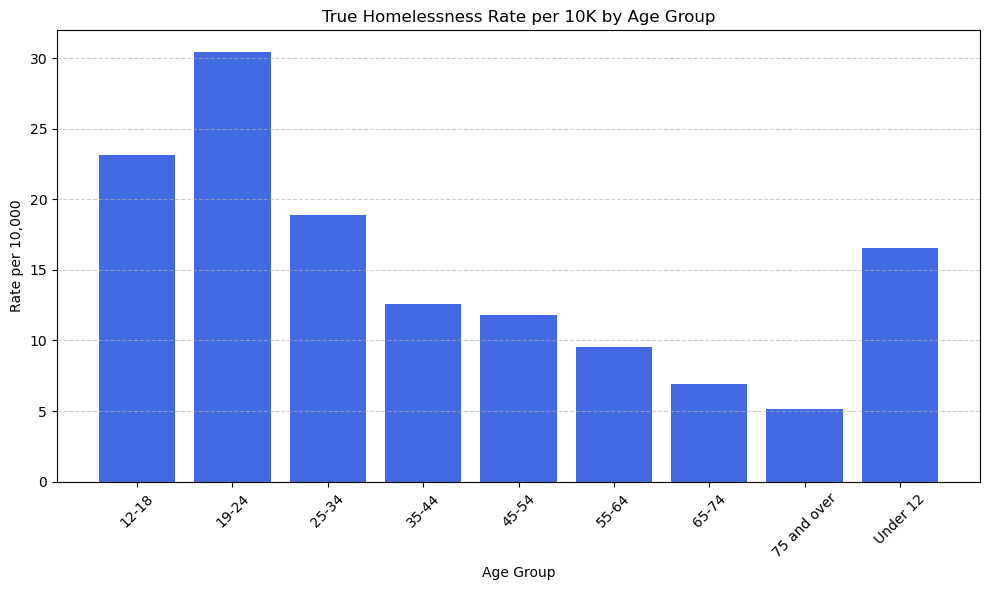

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(age_risk_weighted["age_group"], age_risk_weighted["homeless_rate_per_10K"], color="royalblue")
plt.title("True Homelessness Rate per 10K by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Rate per 10,000")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


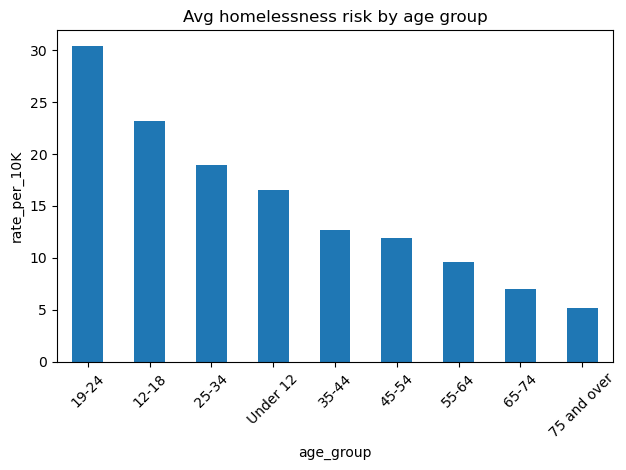

In [10]:
age_risk.plot(kind='bar',title="Avg homelessness risk by age group",ylabel="rate_per_10K")
plt.xticks(rotation=45)
plt.tight_layout()


In [16]:
df_base1_risk.head()

,gender,age_group,homelessness_type,count,population,baseline_risk,homeless_rate_per_10K
0,Male,Under 12,"PEOPLE LIVING IN IMPROVISED DWELLINGS, TENTS, ...",116,1631296,0.000071,0.711091
1,Male,12-18,"PEOPLE LIVING IN IMPROVISED DWELLINGS, TENTS, ...",89,749330,0.000119,1.187728
2,Male,19-24,"PEOPLE LIVING IN IMPROVISED DWELLINGS, TENTS, ...",245,806829,0.000304,3.036579
3,Male,25-34,"PEOPLE LIVING IN IMPROVISED DWELLINGS, TENTS, ...",735,1791231,0.000410,4.103323
4,Male,35-44,"PEOPLE LIVING IN IMPROVISED DWELLINGS, TENTS, ...",1153,1716107,0.000672,6.718695


In [17]:
unique_types=df_base1_risk["homelessness_type"].unique()

for i in unique_types:
    print(i)

PEOPLE LIVING IN IMPROVISED DWELLINGS, TENTS, OR SLEEPING OUT
PEOPLE IN SUPPORTED ACCOMMODATION FOR THE HOMELESS
PEOPLE STAYING TEMPORARILY WITH OTHER HOUSEHOLDS(b)
PEOPLE LIVING IN BOARDING HOUSES(c)
PEOPLE IN OTHER TEMPORARY LODGINGS(c)
PEOPLE LIVING IN 'SEVERELY' CROWDED DWELLINGS(d)
TOTAL HOMELESS PERSONS
PEOPLE LIVING IN OTHER CROWDED DWELLINGS(e) 
PEOPLE IN OTHER IMPROVISED DWELLINGS
PEOPLE WHO ARE MARGINALLY HOUSED IN CARAVAN PARKS(f)


In [19]:
df_filtered=df_base1_risk[
df_base1_risk["homelessness_type"].str.strip().str.upper() != "TOTAL HOMELESS PERSONS"
]

In [20]:
age_risk_weighted = df_filtered.groupby("age_group").agg({
    "count": "sum",
    "population": "sum"
}).reset_index()

age_risk_weighted["homeless_rate_per_10K"] = (age_risk_weighted["count"] / age_risk_weighted["population"]) * 10000


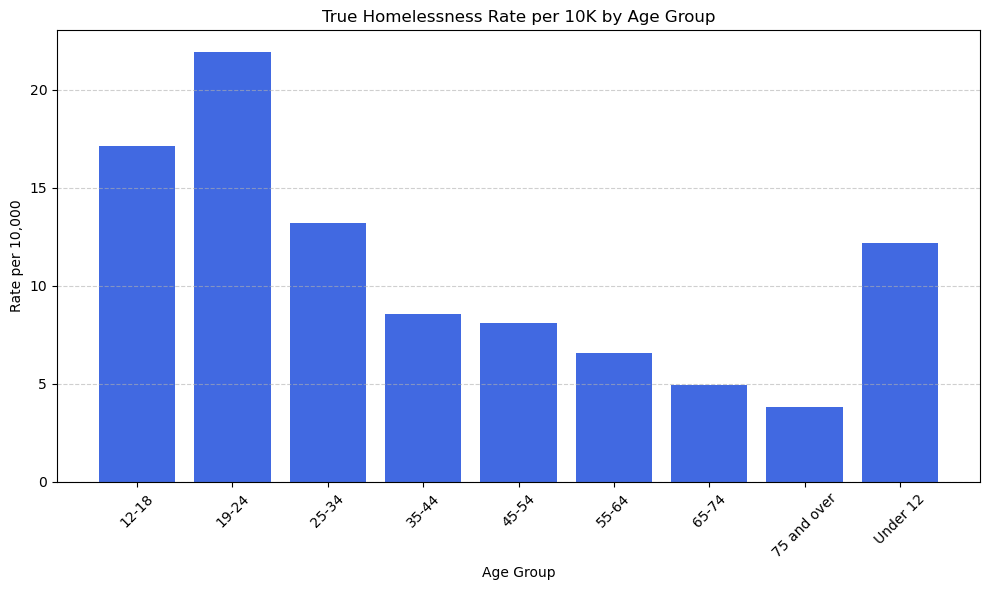

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(age_risk_weighted["age_group"], age_risk_weighted["homeless_rate_per_10K"], color="royalblue")
plt.title("True Homelessness Rate per 10K by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Rate per 10,000")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


## Breakdown by age and gender

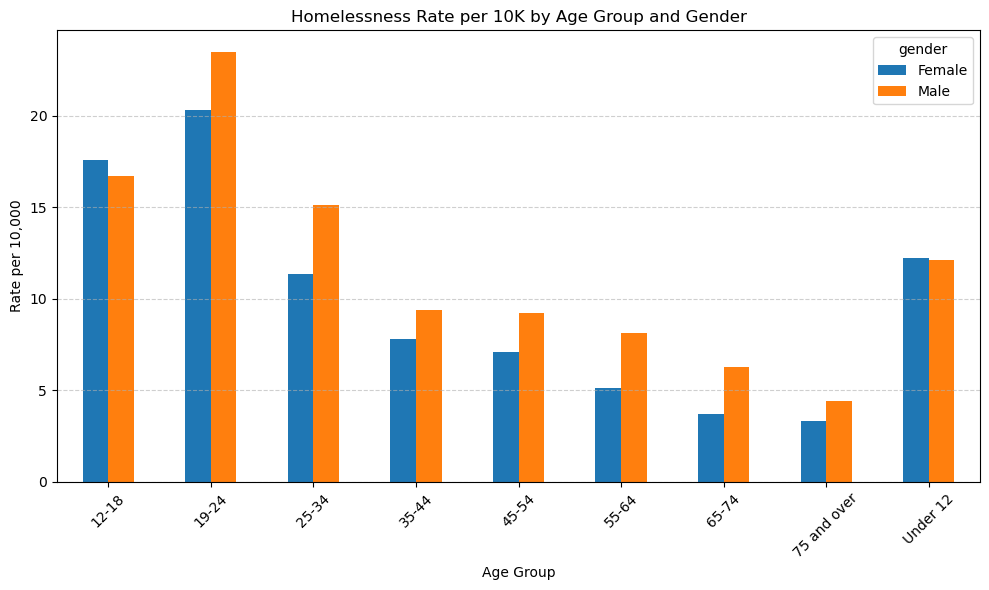

In [22]:
# Group by both age group and gender, sum count and population
gender_age_risk = df_filtered.groupby(['age_group', 'gender']).agg({
    'count': 'sum',
    'population': 'sum'
}).reset_index()

# Calculate homelessness rate per 10K
gender_age_risk['homeless_rate_per_10K'] = (
    gender_age_risk['count'] / gender_age_risk['population']
) * 10000

# Pivot for plotting
pivot_data = gender_age_risk.pivot(index='age_group', columns='gender', values='homeless_rate_per_10K')

# Plot
pivot_data.plot(kind='bar', figsize=(10, 6))
plt.title('Homelessness Rate per 10K by Age Group and Gender')
plt.xlabel('Age Group')
plt.ylabel('Rate per 10,000')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [24]:
# Make a full copy to avoid SettingWithCopyWarning
df_filtered = df_filtered.copy()

# Define the mapping from detailed type to 3 categories
type_to_category = {
    "PEOPLE LIVING IN IMPROVISED DWELLINGS, TENTS, OR SLEEPING OUT": "Primary",
    "PEOPLE IN SUPPORTED ACCOMMODATION FOR THE HOMELESS": "Secondary",
    "PEOPLE STAYING TEMPORARILY WITH OTHER HOUSEHOLDS": "Secondary",
    "PEOPLE LIVING IN BOARDING HOUSES(c)": "Tertiary",
    "PEOPLE IN OTHER TEMPORARY LODGINGS(c)": "Secondary",
    "PEOPLE LIVING IN 'SEVERELY' CROWDED DWELLINGS(d)": "Tertiary",
    "PEOPLE LIVING IN OTHER CROWDED DWELLINGS(e)": "Tertiary",
    "PEOPLE IN OTHER IMPROVISED DWELLINGS": "Primary",
    "PEOPLE WHO ARE MARGINALLY HOUSED IN CARAVAN PARKS(f)": "Tertiary"
}

# Map the categories
df_filtered["homelessness_category"] = df_filtered["homelessness_type"].map(type_to_category)


In [25]:
# Group by age_group and homelessness_category, then sum the counts
category_counts = df_filtered.groupby(["age_group", "homelessness_category"])["count"].sum().unstack(fill_value=0)

# Sort age groups for better visual flow (optional)
age_order = ["Under 12", "12-18", "19-24", "25-34", "35-44", "45-54", "55-64", "65-74", "75 and over"]
category_counts = category_counts.reindex(age_order)


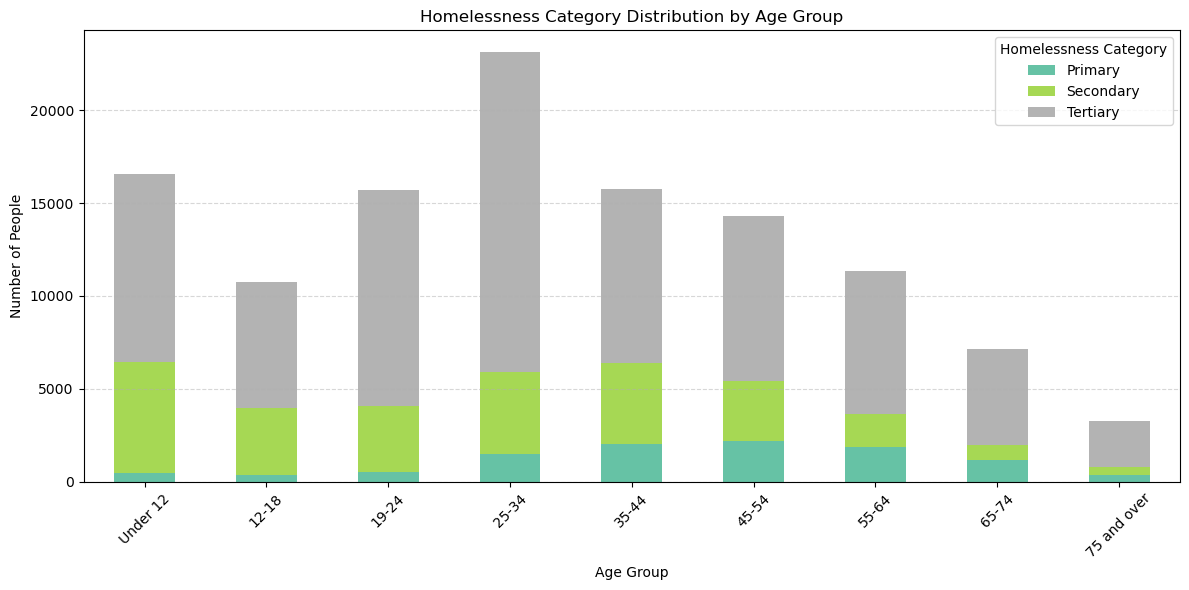

In [26]:
import matplotlib.pyplot as plt

# Plot
category_counts.plot(kind="bar", stacked=True, figsize=(12, 6), colormap="Set2")

# Formatting
plt.title("Homelessness Category Distribution by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Number of People")
plt.xticks(rotation=45)
plt.legend(title="Homelessness Category")
plt.tight_layout()
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()


In [27]:
# Group by age, category, and gender
gender_cat = df_filtered.groupby(["age_group", "gender", "homelessness_category"])["count"].sum().reset_index()

# Pivot for plotting
pivot_gender_cat = gender_cat.pivot_table(index="age_group", columns=["gender", "homelessness_category"], values="count", fill_value=0)


In [28]:
pivot_gender_cat.head()

gender                 Female                       Male                   
homelessness_category Primary Secondary Tertiary Primary Secondary Tertiary
age_group                                                                  
12-18                   155.0    1917.0   3346.0   183.0    1706.0   3432.0
19-24                   222.0    1997.0   5012.0   307.0    1534.0   6650.0
25-34                   603.0    2643.0   6744.0   878.0    1787.0  10496.0
35-44                   712.0    2421.0   3804.0  1308.0    1952.0   5538.0
45-54                   731.0    1543.0   3385.0  1467.0    1698.0   5499.0

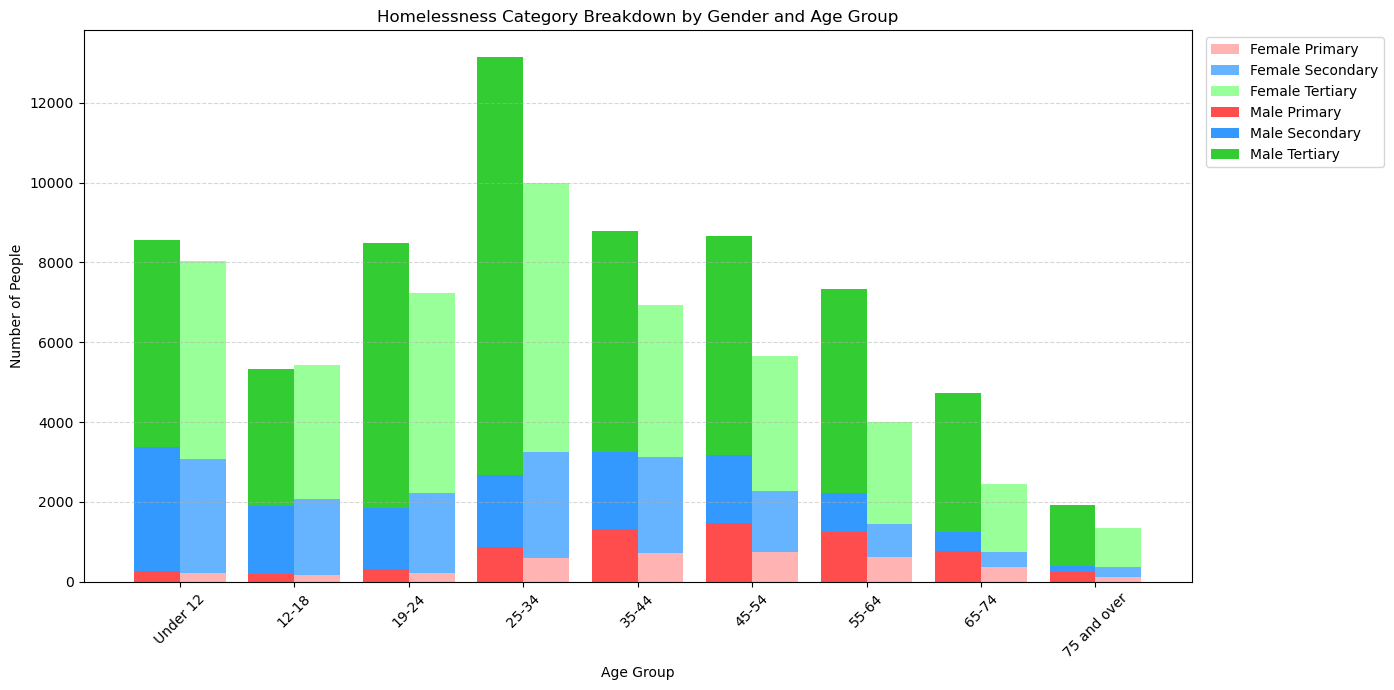

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# Pivot for clarity (you already have this structure)
pivot = df_filtered.groupby(["age_group", "gender", "homelessness_category"])["count"].sum().reset_index()

# Pivot table with multi-level columns
pivot_table = pivot.pivot_table(
    index="age_group",
    columns=["gender", "homelessness_category"],
    values="count",
    fill_value=0
).reindex([
    "Under 12", "12-18", "19-24", "25-34", "35-44", "45-54", "55-64", "65-74", "75 and over"
])

# Flatten column names for easier access
pivot_table.columns = ['_'.join(col).strip() for col in pivot_table.columns.values]
pivot_table = pivot_table.reset_index()

# Plot
fig, ax = plt.subplots(figsize=(14, 7))

# Plot for Female
female_bottom = None
for category, color in zip(["Primary", "Secondary", "Tertiary"], ["#ffb3b3", "#66b3ff", "#99ff99"]):
    col = f"Female_{category}"
    ax.bar(
        pivot_table["age_group"],
        pivot_table[col],
        label=f"Female {category}",
        bottom=female_bottom,
        width=0.4,
        align="edge",
        color=color
    )
    female_bottom = (pivot_table[col] if female_bottom is None else female_bottom + pivot_table[col])

# Plot for Male
male_bottom = None
for category, color in zip(["Primary", "Secondary", "Tertiary"], ["#ff4d4d", "#3399ff", "#33cc33"]):
    col = f"Male_{category}"
    ax.bar(
        pivot_table["age_group"],
        pivot_table[col],
        label=f"Male {category}",
        bottom=male_bottom,
        width=-0.4,
        align="edge",
        color=color
    )
    male_bottom = (pivot_table[col] if male_bottom is None else male_bottom + pivot_table[col])

# Customize
plt.title("Homelessness Category Breakdown by Gender and Age Group")
plt.xlabel("Age Group")
plt.ylabel("Number of People")
plt.xticks(rotation=45)
plt.legend(loc="upper right", bbox_to_anchor=(1.18, 1))
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


->Highest Homelessness occurs in the 25–34 age group, especially among males.

->Tertiary homelessness (e.g., overcrowded housing) is the most common type across all ages and genders.

->Males consistently outnumber females, particularly in the 25–64 age range.

->Females aged 12–24 show notable levels of secondary homelessness (e.g., couch surfing).

->Homelessness decreases with age, but tertiary homelessness remains among older adults.

->Under 12 category reflects hidden homelessness, likely due to family housing situations.



## Comparison by state

In [5]:
file_path="state_wise.xlsx"
state_df=pd.read_excel(file_path,sheet_name="Sheet2")

In [6]:
state_df.head()

,Age groups (years),NSW,Vic.,Qld,SA,WA,Tas.,NT,ACT,Aust.(d)(e),Year
0,Under 12,36.1,44.2,45.6,56.1,28.4,44.9,693.2,38.7,47.9,2021
1,12–18,41.6,50.7,46.2,58.6,37.5,54.7,804.8,46.7,53.3,2021
2,19–24,83.8,102.9,70.6,83.0,57.4,93.2,855.9,57.9,90.6,2021
3,25–34,70.6,72.8,56.0,58.5,48.0,67.4,534.4,56.2,70.4,2021
4,35–44,44.3,46.2,43.6,45.8,42.6,43.5,483.8,38.8,49.0,2021


In [7]:
state_df=state_df.dropna(how='all')
state_df=state_df[state_df['Age groups (years)'].notna()]

In [9]:
state_df.rename(columns={'Age groups (years)':'age_grp'},inplace=True)

In [11]:
state_df.head()

,age_grp,NSW,Vic.,Qld,SA,WA,Tas.,NT,ACT,Aust.(d)(e),Year
0,Under 12,36.1,44.2,45.6,56.1,28.4,44.9,693.2,38.7,47.9,2021
1,12–18,41.6,50.7,46.2,58.6,37.5,54.7,804.8,46.7,53.3,2021
2,19–24,83.8,102.9,70.6,83.0,57.4,93.2,855.9,57.9,90.6,2021
3,25–34,70.6,72.8,56.0,58.5,48.0,67.4,534.4,56.2,70.4,2021
4,35–44,44.3,46.2,43.6,45.8,42.6,43.5,483.8,38.8,49.0,2021


In [12]:
state_df['age_grp']=state_df['age_grp'].astype(str).str.strip()

In [13]:
state_df.set_index("age_grp",inplace=True)

In [19]:
state_df_2021 = state_df[state_df["Year"] == 2021].copy()

In [21]:
state_df_2021.head()

,NSW,Vic.,Qld,SA,WA,Tas.,NT,ACT,Aust.(d)(e),Year
age_grp,,,,,,,,,,
Under 12,36.1,44.2,45.6,56.1,28.4,44.9,693.2,38.7,47.9,2021
12–18,41.6,50.7,46.2,58.6,37.5,54.7,804.8,46.7,53.3,2021
19–24,83.8,102.9,70.6,83.0,57.4,93.2,855.9,57.9,90.6,2021
25–34,70.6,72.8,56.0,58.5,48.0,67.4,534.4,56.2,70.4,2021
35–44,44.3,46.2,43.6,45.8,42.6,43.5,483.8,38.8,49.0,2021


In [24]:
state_df_2021.drop(columns=['Year'],inplace=True)

<Figure size 3400x700 with 0 Axes>

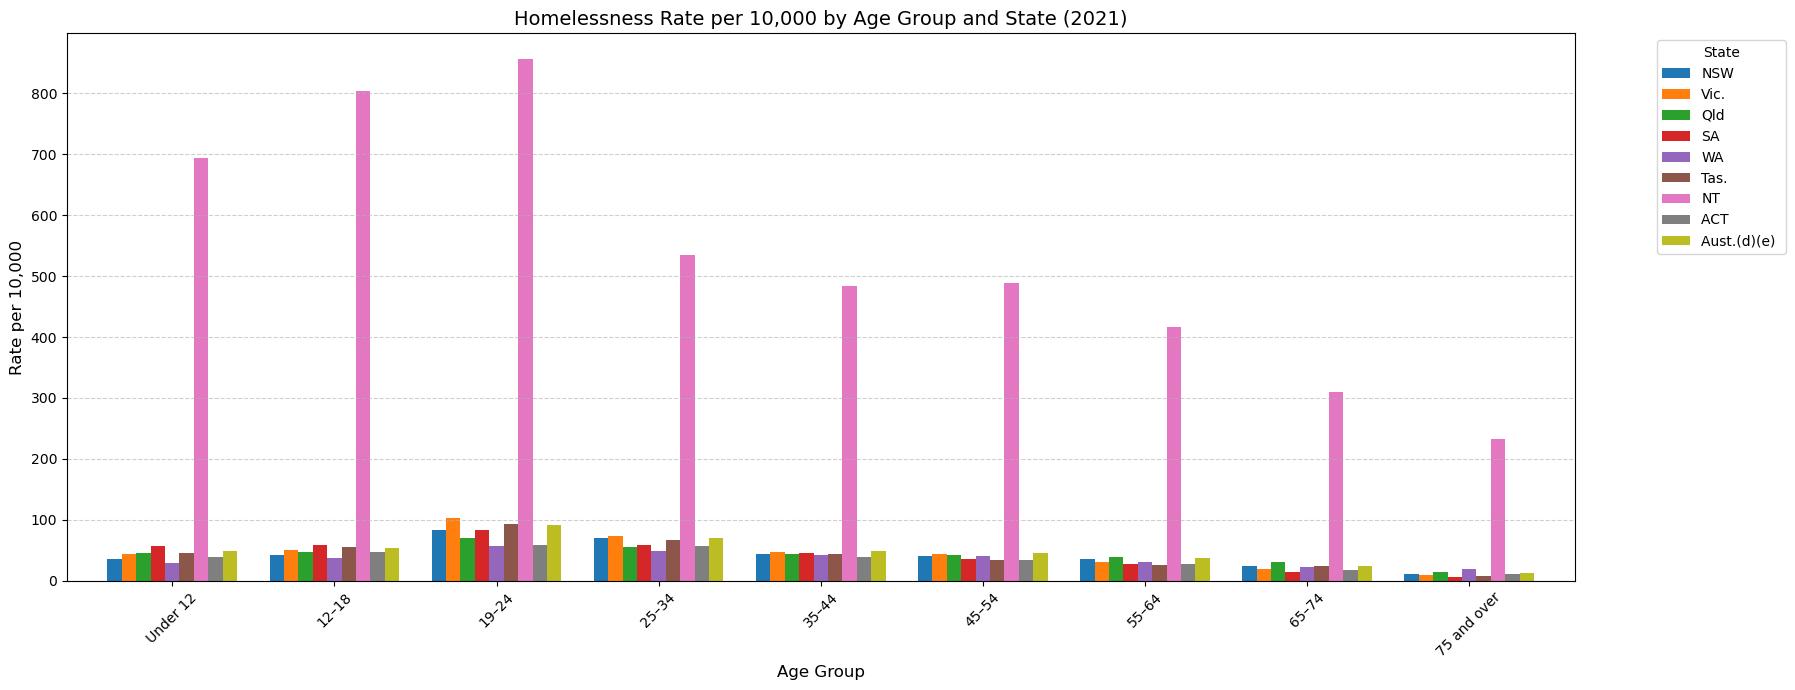

In [30]:
plt.figure(figsize=(34, 7))
state_df_2021.plot(kind="bar", figsize=(18,7), width=0.8)

plt.title("Homelessness Rate per 10,000 by Age Group and State (2021)", fontsize=14)
plt.xlabel("Age Group", fontsize=12)
plt.ylabel("Rate per 10,000", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="State", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

## Findings by Age Group (2006–2021)
1. Young Adults (19–24 years) consistently have the highest homelessness rates
Across all years and states, the 19–24 age group shows the highest rates per 10,000 population.

In 2021: NT (855.9), WA (57.4), Vic (102.9), Qld (70.6)

National average: 90.6 per 10,000

This reflects vulnerability during the transition to independent living, unstable housing, or youth leaving institutional care.

2. Children and Teenagers (Under 12 & 12–18 years) have moderate but rising rates
Under 12s: NT has extremely high values (693.2 in 2021), suggesting family-based homelessness.

12–18 group shows a steady increase in all states until 2016, followed by a plateau in 2021.

Indicates possible impacts from family conflict or school disengagement.

3. Middle-Aged Adults (35–54 years) show moderate but stable rates
Most states show 40–50 per 10,000 in this group.

Relatively stable over time, possibly due to stronger job market attachment or housing security in this life stage.

4. Older Adults (65–74 and 75+) have the lowest homelessness rates
However, rates are rising gradually, especially in NT:

NT (75+): rose from 535.4 in 2011 to 640.6 in 2006, slightly declining to 232.6 in 2021.

Indicates growing risk for elderly homelessness, possibly tied to affordability and aged care access.

5. The Northern Territory (NT) is an outlier across all age groups
Extremely high homelessness rates in every age group and every year.

For 19–24 year olds: consistently 850–1088 per 10,000

Even in the 65–74 group, NT reports 309 per 10,000 in 2021, while national average is around 25.

6. National trends show mild decline after 2016 in most age groups
Most age groups’ rates declined slightly in 2021 compared to 2016.

Suggests improved housing policies, though NT and youth remain problematic.

In [31]:
state_df.head()

,NSW,Vic.,Qld,SA,WA,Tas.,NT,ACT,Aust.(d)(e),Year
age_grp,,,,,,,,,,
Under 12,36.1,44.2,45.6,56.1,28.4,44.9,693.2,38.7,47.9,2021
12–18,41.6,50.7,46.2,58.6,37.5,54.7,804.8,46.7,53.3,2021
19–24,83.8,102.9,70.6,83.0,57.4,93.2,855.9,57.9,90.6,2021
25–34,70.6,72.8,56.0,58.5,48.0,67.4,534.4,56.2,70.4,2021
35–44,44.3,46.2,43.6,45.8,42.6,43.5,483.8,38.8,49.0,2021


In [3]:
df_hl_types=pd.read_excel("state_wise.xlsx",sheet_name="homelessness_type")

In [4]:
df_hl_types.head()

,Homeless operational groups(f),NSW,Vic.,Qld,SA,WA,Tas.,NT,ACT,Aust.(d)(e),Year
0,"People living in improvised dwellings, tents, ...",1.2,1.6,4.0,1.8,8.7,4.1,28.5,1.3,3.0,2021
1,People in supported accommodation for the home...,6.2,12.0,8.0,14.0,6.1,9.5,76.1,19.0,9.6,2021
2,People staying temporarily with other househol...,5.1,3.9,9.6,7.5,8.0,10.5,28.1,5.9,6.5,2021
3,People living in boarding houses(i),11.0,13.2,5.7,3.7,2.4,4.7,2.7,3.0,8.7,2021
4,People in other temporary lodgings(i),1.8,2.4,0.9,1.4,0.4,0.5,1.9,0.1,1.5,2021


In [5]:
# Example mapping (adjust to your labels)
type_map = {
    "People living in improvised dwellings, tents, or sleeping out": "Primary",
    "People in supported accommodation for the homeless(g) ": "Secondary",
    "People staying temporarily with other households(h)": "Secondary",
    "People living in boarding houses(i)": "Tertiary",
    "People in other temporary lodgings(i)": "Secondary",
    "People living in 'severely' crowded dwellings(j)": "Tertiary"
}
df_hl_types["Category"]=df_hl_types["Homeless operational groups(f)"].map(type_map)

In [6]:
df_hl_types.head()

,Homeless operational groups(f),NSW,Vic.,Qld,SA,WA,Tas.,NT,ACT,Aust.(d)(e),Year,Category
0,"People living in improvised dwellings, tents, ...",1.2,1.6,4.0,1.8,8.7,4.1,28.5,1.3,3.0,2021,Primary
1,People in supported accommodation for the home...,6.2,12.0,8.0,14.0,6.1,9.5,76.1,19.0,9.6,2021,Secondary
2,People staying temporarily with other househol...,5.1,3.9,9.6,7.5,8.0,10.5,28.1,5.9,6.5,2021,Secondary
3,People living in boarding houses(i),11.0,13.2,5.7,3.7,2.4,4.7,2.7,3.0,8.7,2021,Tertiary
4,People in other temporary lodgings(i),1.8,2.4,0.9,1.4,0.4,0.5,1.9,0.1,1.5,2021,Secondary


In [7]:
df_hl_types.isnull().sum()


Homeless operational groups(f)    0
NSW                               0
Vic.                              0
Qld                               0
SA                                0
WA                                0
Tas.                              0
NT                                0
ACT                               0
Aust.(d)(e)                       0
Year                              0
Category                          0
dtype: int64

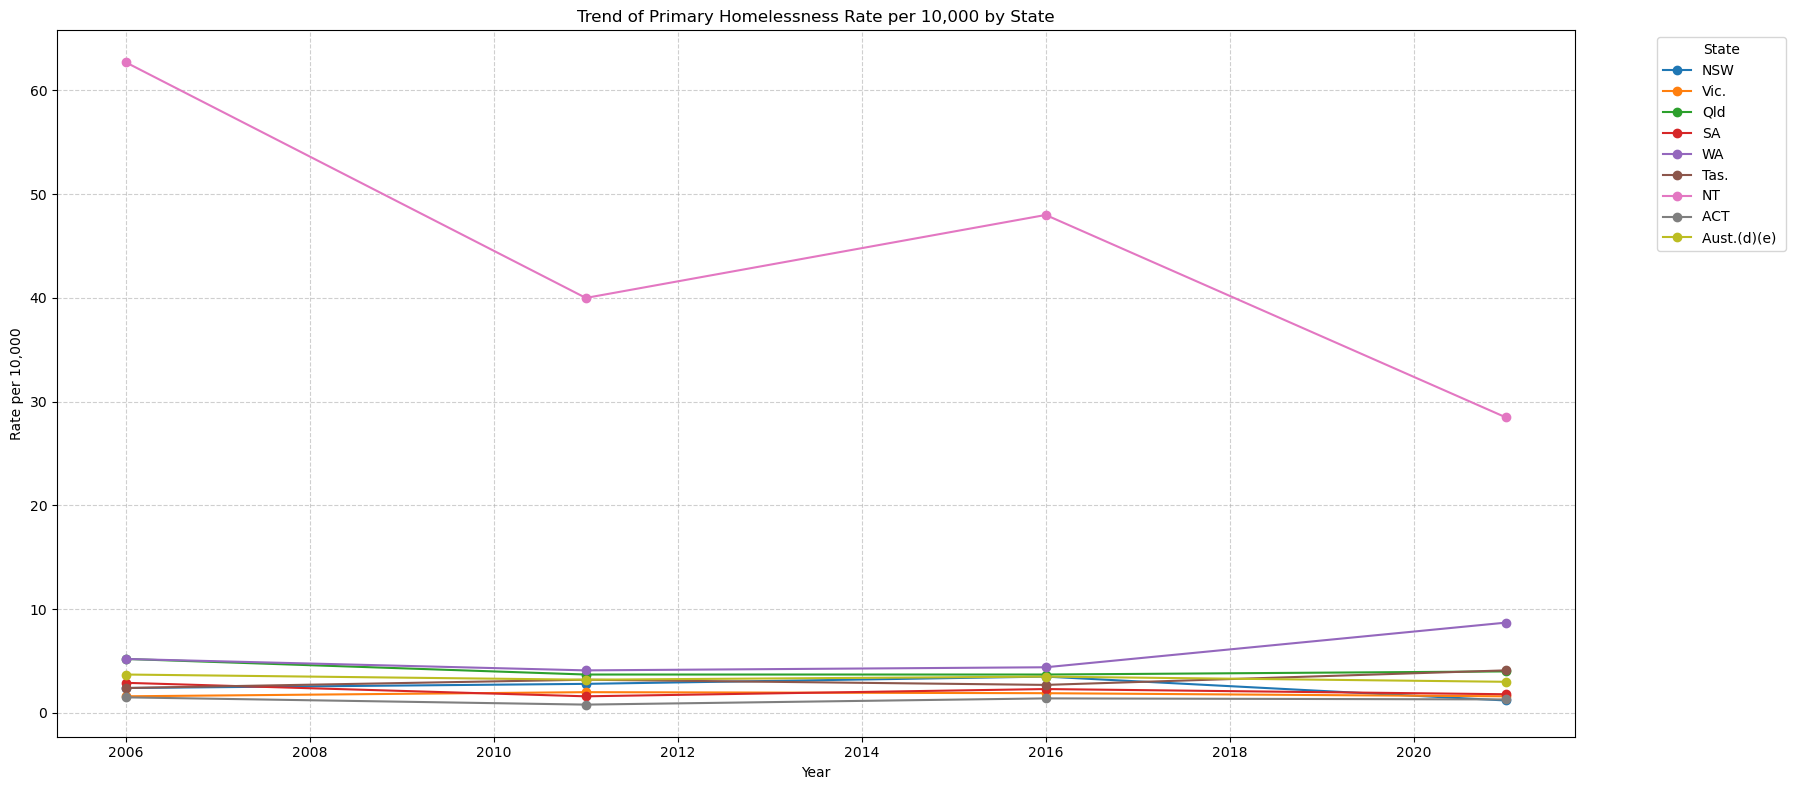

In [16]:
states = ["NSW", "Vic.", "Qld", "SA", "WA", "Tas.", "NT", "ACT ", "Aust.(d)(e) "]
for category in ["Primary"]:
    plt.figure(figsize=(18, 8))  # FIXED INDENTATION HERE
    for state in states:
        df_sub = df_hl_types[df_hl_types["Category"] == category]
        plt.plot(df_sub["Year"], df_sub[state], marker='o', label=state)

    plt.title(f"Trend of {category} Homelessness Rate per 10,000 by State")
    plt.xlabel("Year")
    plt.ylabel("Rate per 10,000")
    plt.legend(title="State", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

In [9]:
print(df_hl_types.columns)

Index(['Homeless operational groups(f)', 'NSW', 'Vic.', 'Qld', 'SA', 'WA',
       'Tas.', 'NT', 'ACT ', 'Aust.(d)(e) ', 'Year', 'Category'],
      dtype='object')


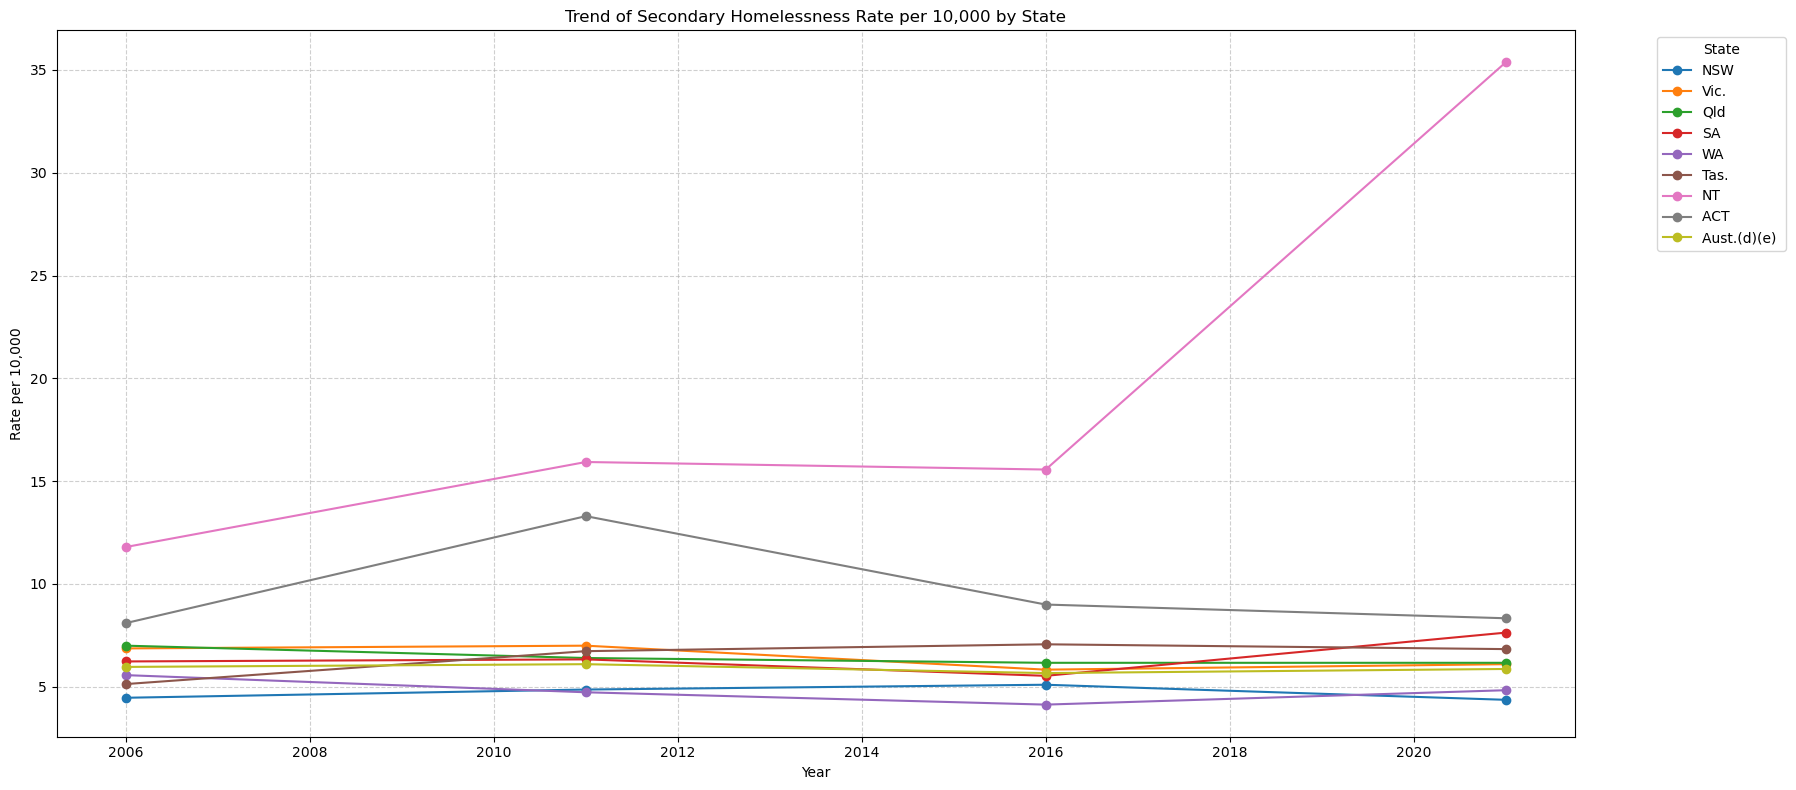

In [14]:
import matplotlib.pyplot as plt

states = ["NSW", "Vic.", "Qld", "SA", "WA", "Tas.", "NT", "ACT ", "Aust.(d)(e) "]

# Filter for Secondary category and remove any rows with all-NaNs in state columns
df_secondary = df_hl_types[df_hl_types["Category"] == "Secondary"]
df_secondary = df_secondary.dropna(subset=states, how='all')

# Group by Year in case duplicates exist and take average per state
df_secondary = df_secondary.groupby("Year")[states].mean().reset_index()

# Plot
plt.figure(figsize=(18, 8))
for state in states:
    plt.plot(df_secondary["Year"], df_secondary[state], marker='o', label=state)

plt.title("Trend of Secondary Homelessness Rate per 10,000 by State")
plt.xlabel("Year")
plt.ylabel("Rate per 10,000")
plt.legend(title="State", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


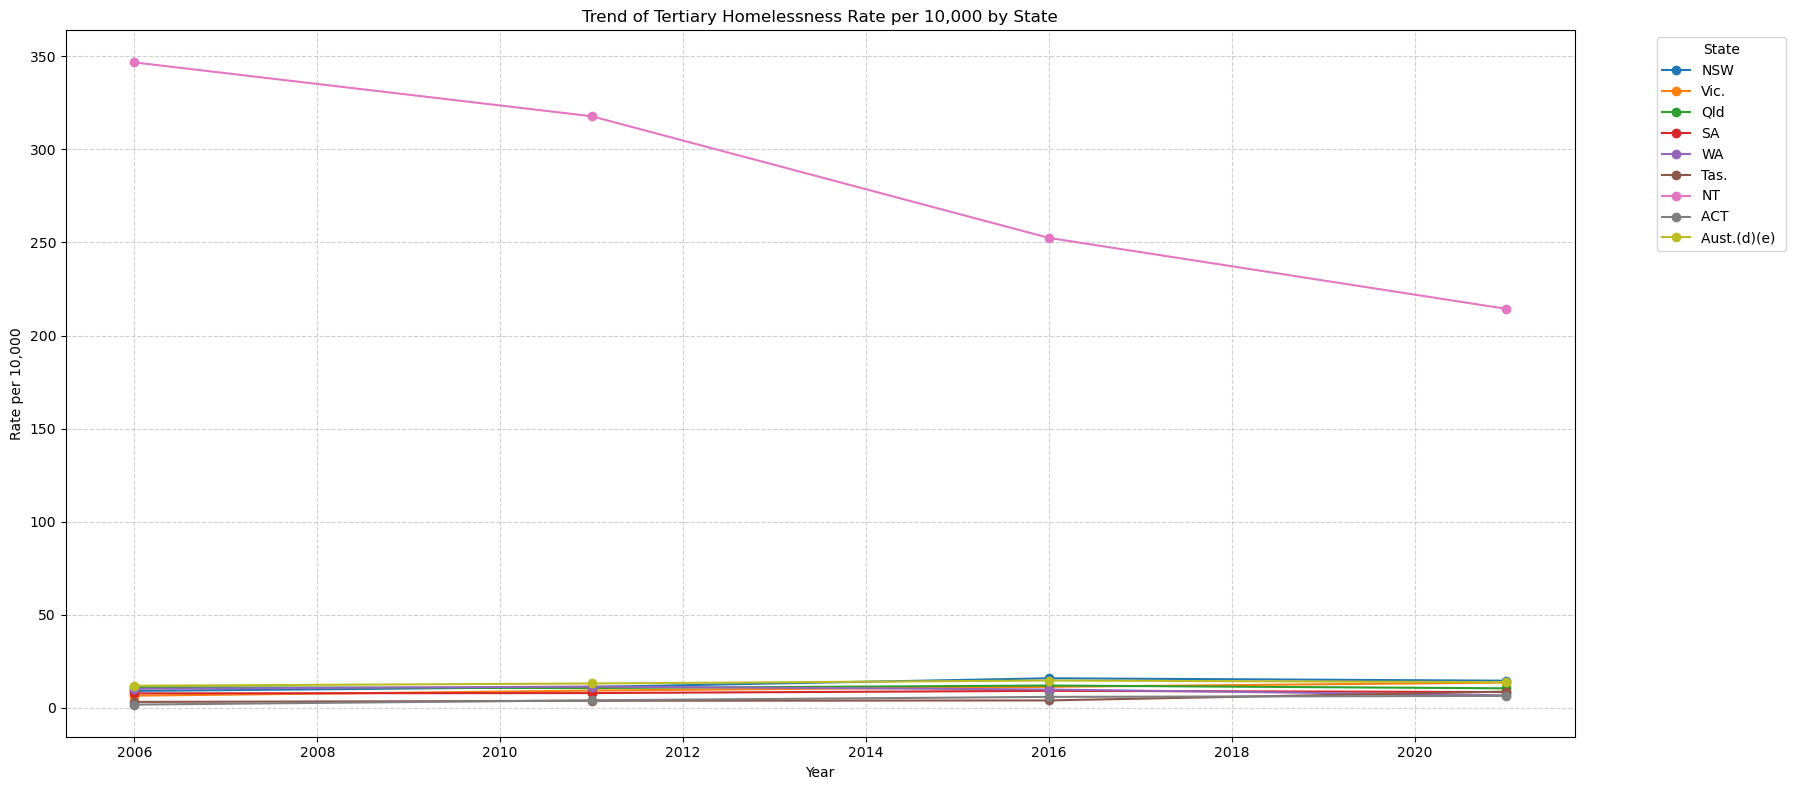

In [15]:
import matplotlib.pyplot as plt

# List of state columns
states = ["NSW", "Vic.", "Qld", "SA", "WA", "Tas.", "NT", "ACT ", "Aust.(d)(e) "]

# Filter for 'Tertiary' category
df_tertiary = df_hl_types[df_hl_types["Category"] == "Tertiary"]

# Drop rows where all states are NaN (to avoid misleading lines)
df_tertiary = df_tertiary.dropna(subset=states, how='all')

# Group by Year to ensure one row per year
df_tertiary = df_tertiary.groupby("Year")[states].mean().reset_index()

# Plotting
plt.figure(figsize=(18, 8))
for state in states:
    plt.plot(df_tertiary["Year"], df_tertiary[state], marker='o', label=state)

plt.title("Trend of Tertiary Homelessness Rate per 10,000 by State")
plt.xlabel("Year")
plt.ylabel("Rate per 10,000")
plt.legend(title="State", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


## Primary Homelessness
Consistently low nationally, typically under 10 per 10,000 in most states.

NT stands out with higher rates (e.g., 28.5 in 2021).

Trend: Slight decline nationally over time, possibly reflecting better access to shelters or support programs.


## Secondary Homelessness
More variable across states:

QLD and VIC have high "staying temporarily" rates (10.5 and 8.0 per 10,000 in 2021).

ACT and NT had notably higher usage of temporary lodgings in earlier years.

ACT had 9.1 per 10,000 in temporary lodgings in 2021 — the highest in Australia for that category.

## Tertiary Homelessness
By far the most prevalent form.

NT had an alarming 426 per 10,000 people in severely crowded dwellings in 2021.

WA, QLD, and SA consistently show higher-than-average tertiary homelessness.

National average for tertiary homelessness in 2021: 18.8 per 10,000.



Unique Indigenous Status values: ['Aboriginal and/or Torres Strait Islander(k)' 'Non-Indigenous'
 'Not stated']


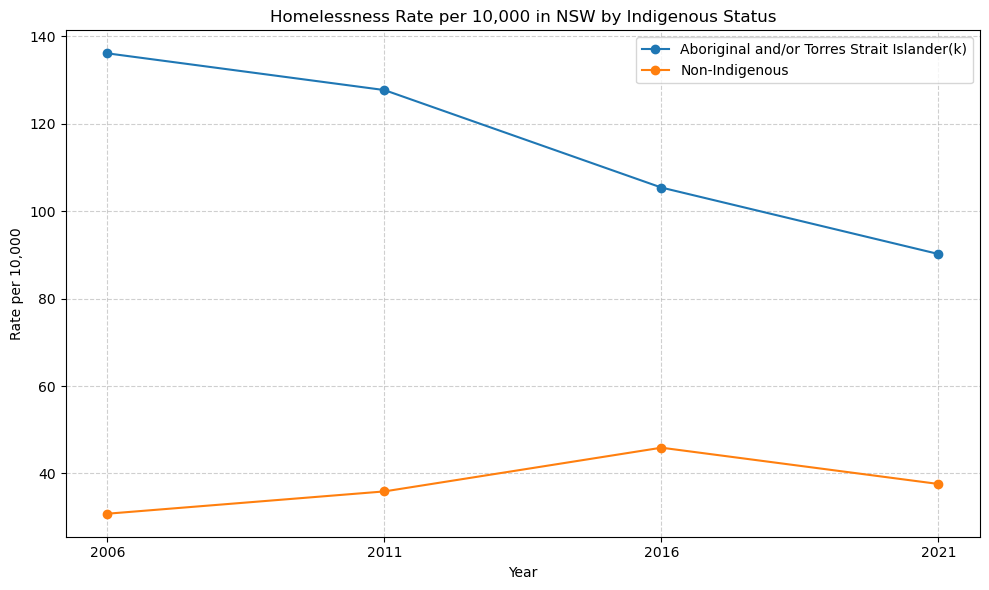

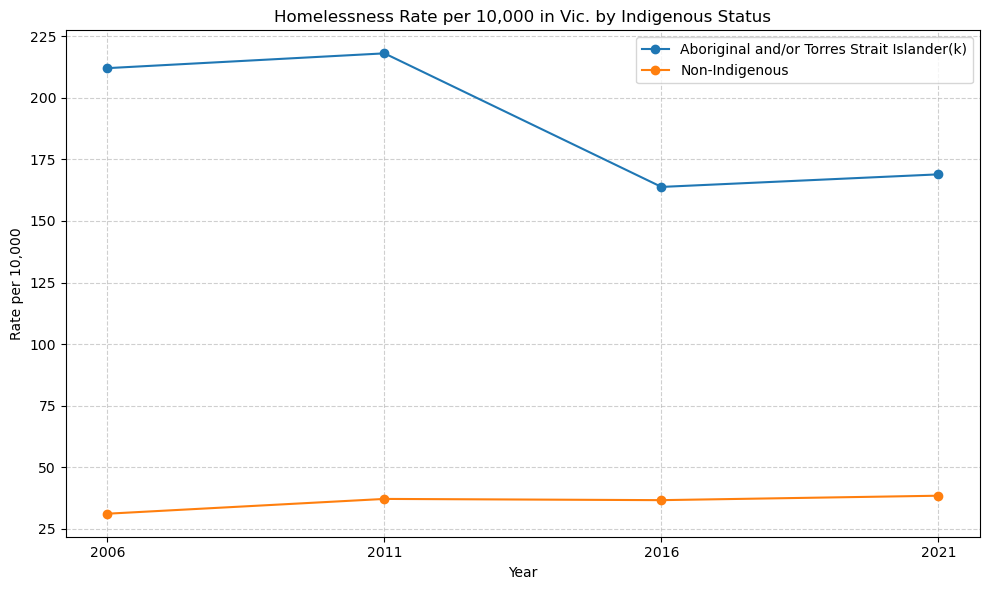

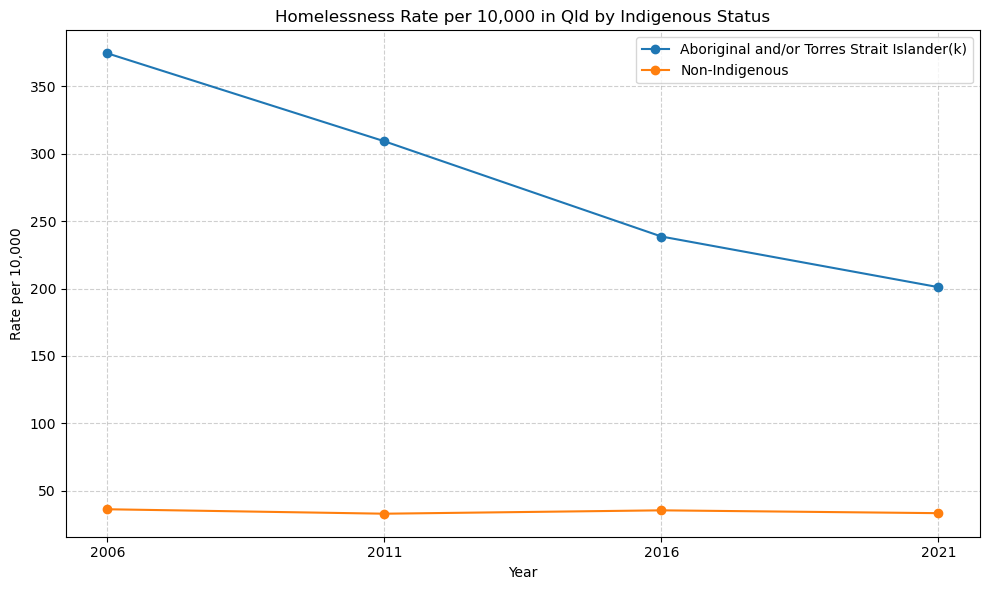

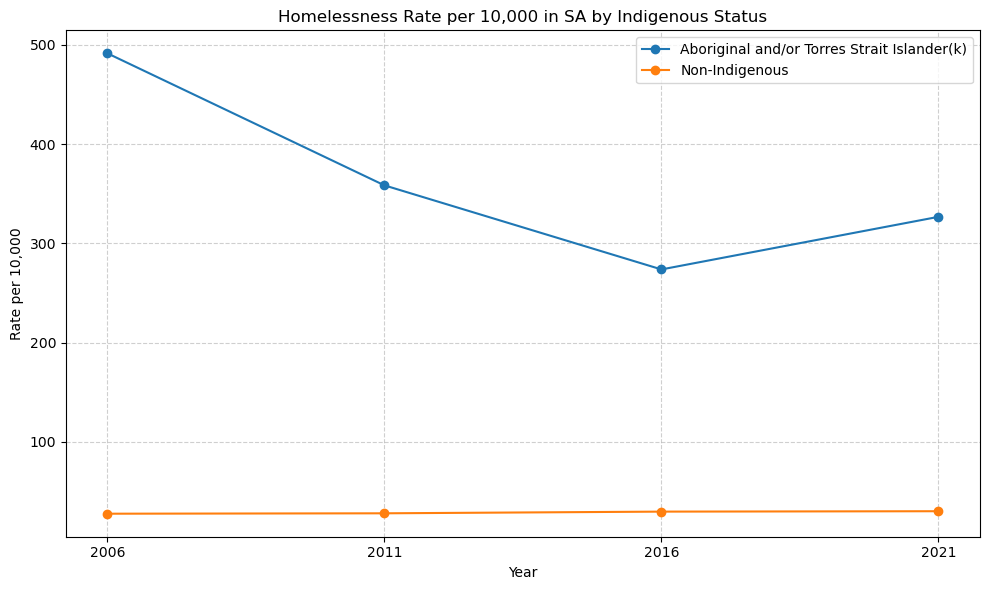

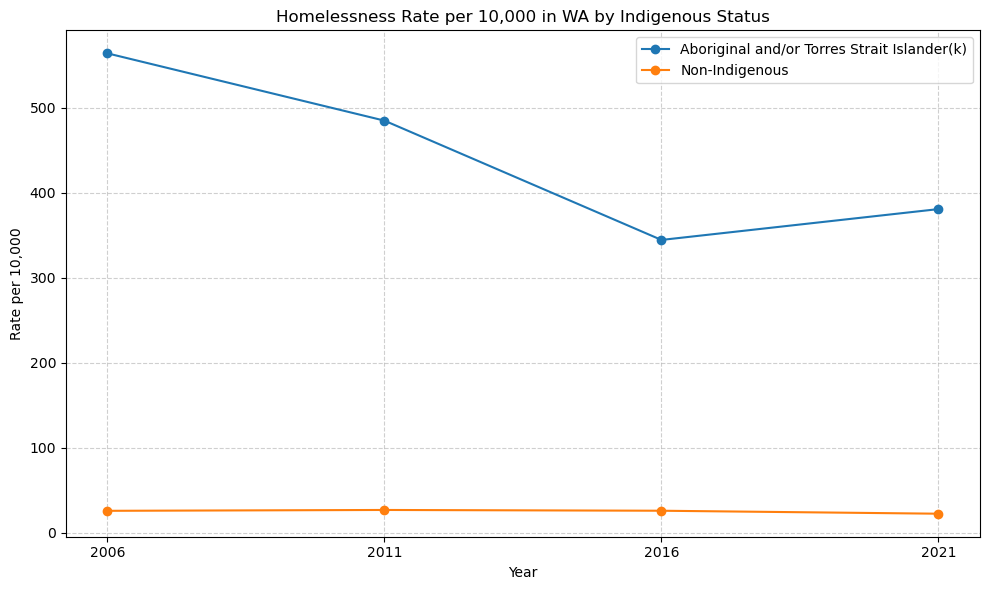

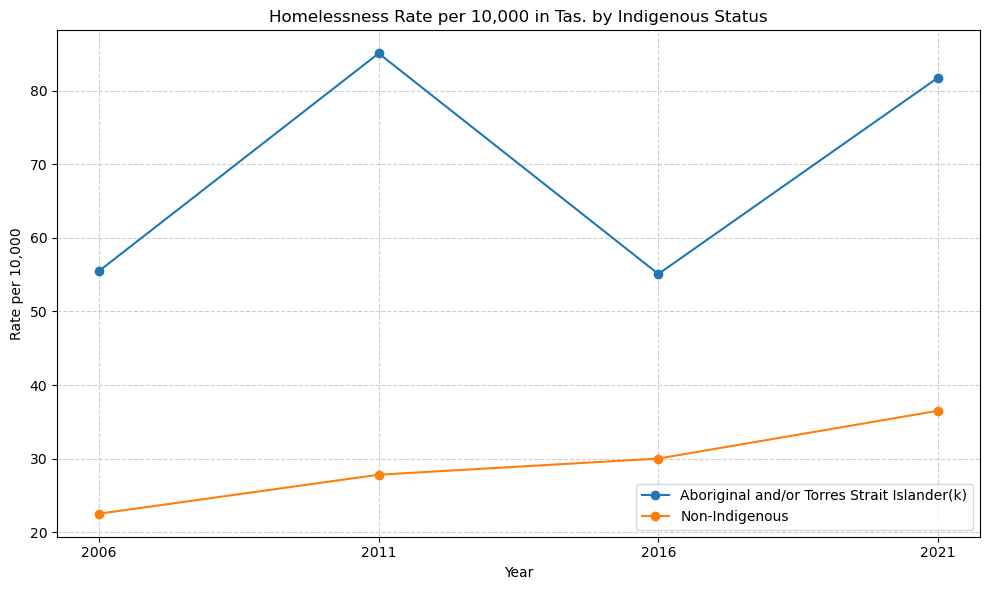

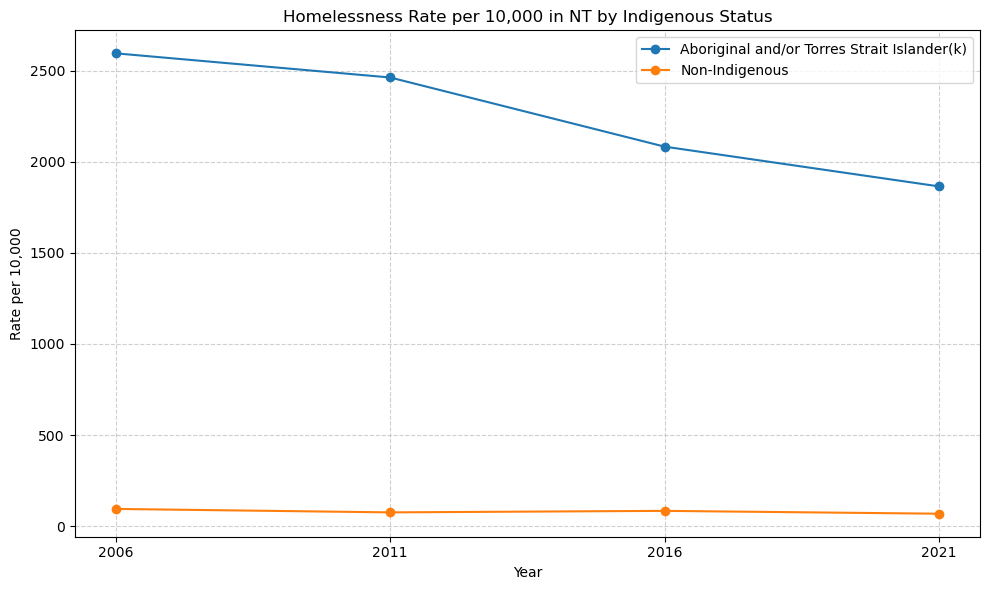

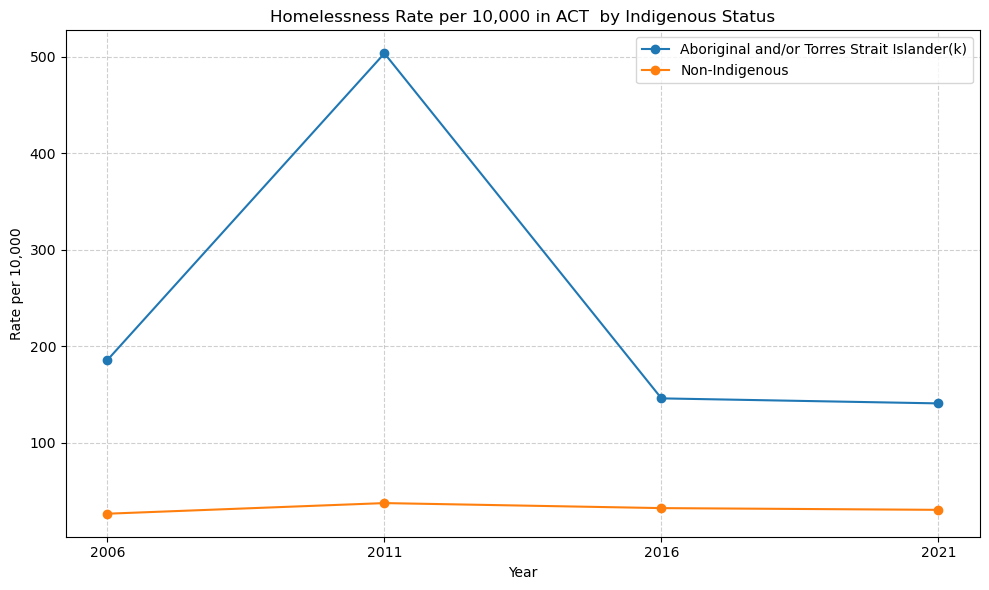

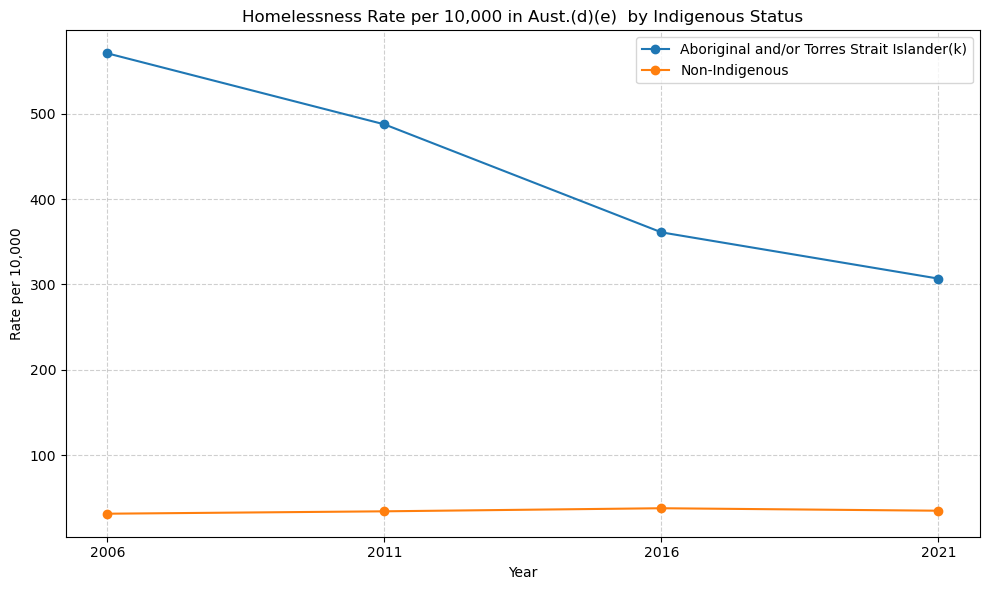

In [21]:
file_path = "state_wise.xlsx"
df_ind = pd.read_excel(file_path, sheet_name="indigenous")

# View available unique statuses
print("Unique Indigenous Status values:", df_ind["Indigenous Status"].unique())

# List of states/territories
states = ["NSW", "Vic.", "Qld", "SA", "WA", "Tas.", "NT", "ACT ", "Aust.(d)(e) "]

# Plot: Trends over time for Indigenous vs Non-Indigenous by state
for state in states:
    plt.figure(figsize=(10, 6))
    
    for status in ["Aboriginal and/or Torres Strait Islander(k)", "Non-Indigenous"]:
        df_status = df_ind[df_ind["Indigenous Status"] == status]
        plt.plot(df_status["Year"], df_status[state], marker="o", label=status)

    plt.title(f"Homelessness Rate per 10,000 in {state} by Indigenous Status")
    plt.xlabel("Year")
    plt.ylabel("Rate per 10,000")
    plt.xticks([2006, 2011, 2016, 2021])
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.legend()
    plt.tight_layout()
    plt.show()

In [19]:
df_status['Indigenous Status'].unique()


array(['Non-Indigenous'], dtype=object)

In [20]:
print(df_ind["Indigenous Status"].unique())

['Aboriginal and/or Torres Strait Islander(k)' 'Non-Indigenous'
 'Not stated']


## 1. Significant Disparity Based on Indigenous Status
Individuals identifying as Aboriginal and/or Torres Strait Islander consistently experienced much higher rates of homelessness compared to Non-Indigenous Australians.

Across all years and states, this population group had the highest homelessness rates, highlighting persistent inequality.

## 2. Extreme Rates in the Northern Territory (NT)
NT exhibited alarmingly high homelessness rates among Indigenous populations:

2006: 2,594.4 per 10,000

2011: 2,461.9 per 10,000

2021: 1,864.5 per 10,000

## 3. Trends Across Time
Slight declines in Indigenous homelessness rates were observed in some states after 2011, but most remained substantially high in 2021.


## 4.State-Level Observations
Western Australia (WA) and South Australia (SA) also showed high Indigenous homelessness rates, exceeding 300 per 10,000 in 2021.

NSW and Victoria, while lower than NT/WA, still presented Indigenous rates 2–3 times higher than national averages.

ACT and Tasmania showed lower absolute values but the gap between groups remained significant.

## Implications

The data highlights the need for targeted policies, especially in:

Indigenous housing support

Regional services (especially NT, WA, Qld)

Addressing underlying causes like overcrowding, displacement, and cultural inaccessibility of services.

Data collection must improve, especially to address high "Not stated" counts in some jurisdictions.





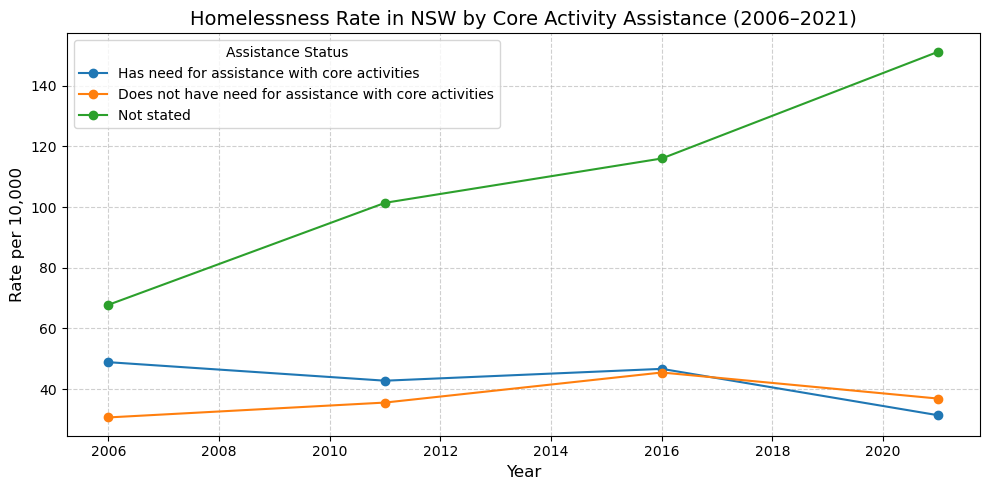

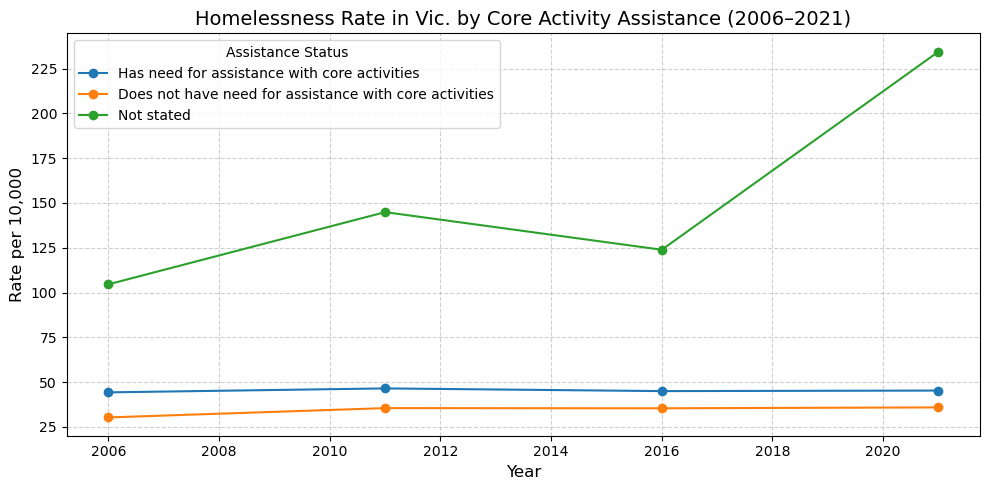

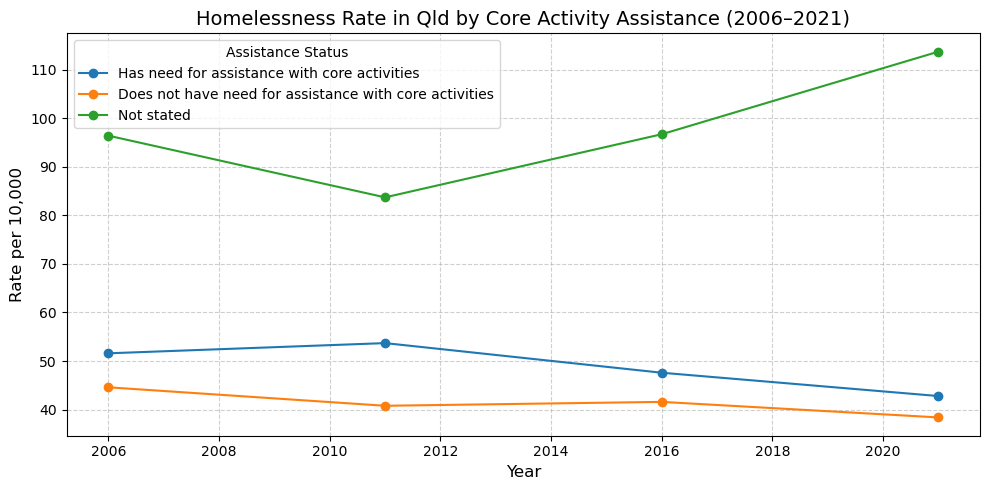

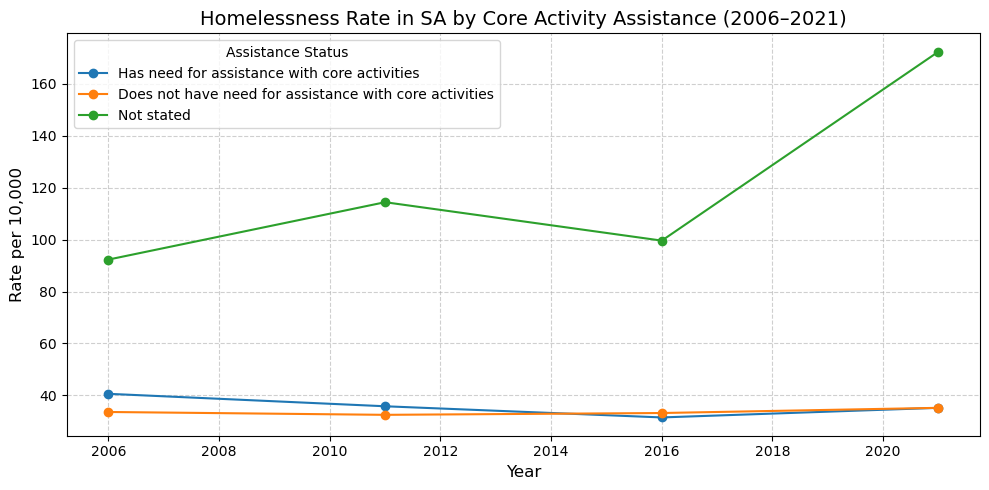

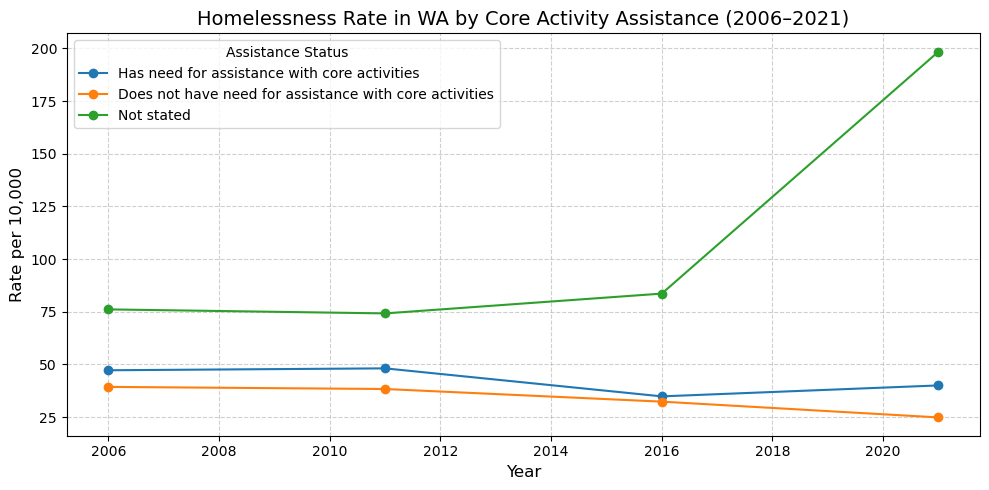

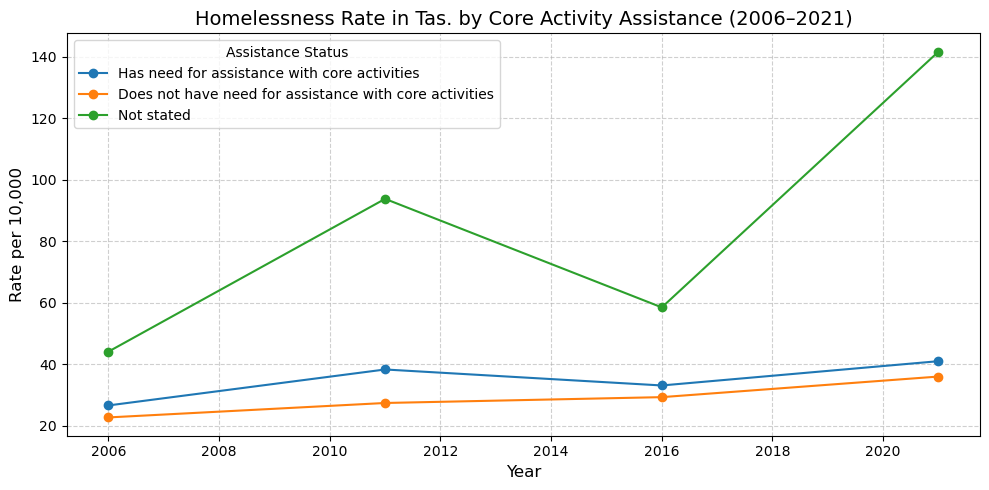

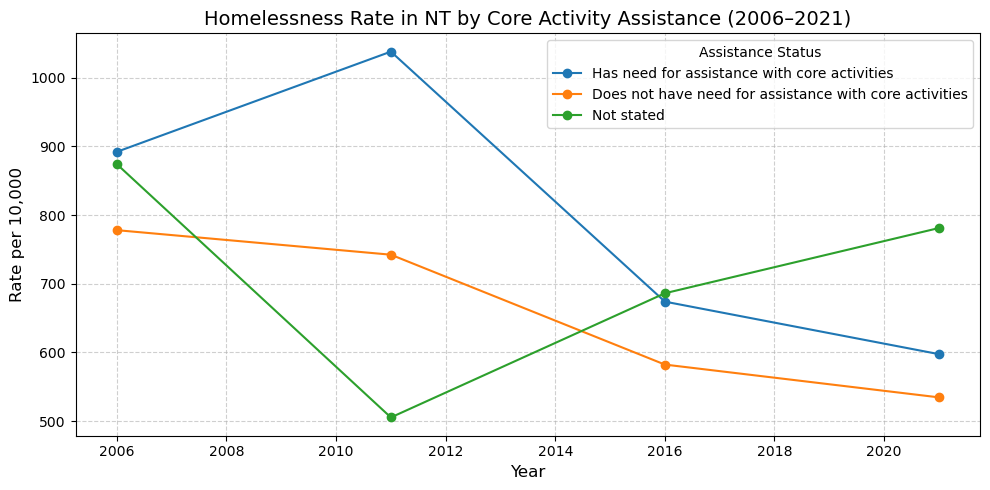

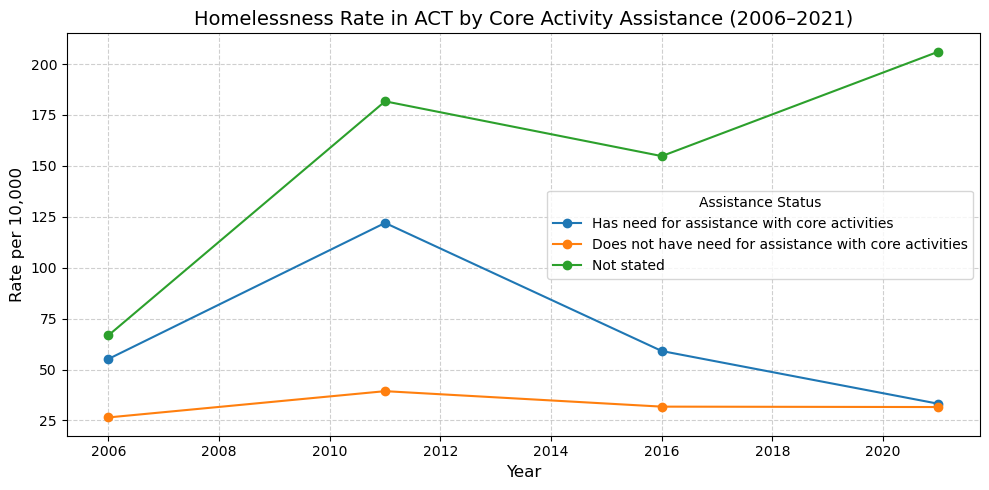

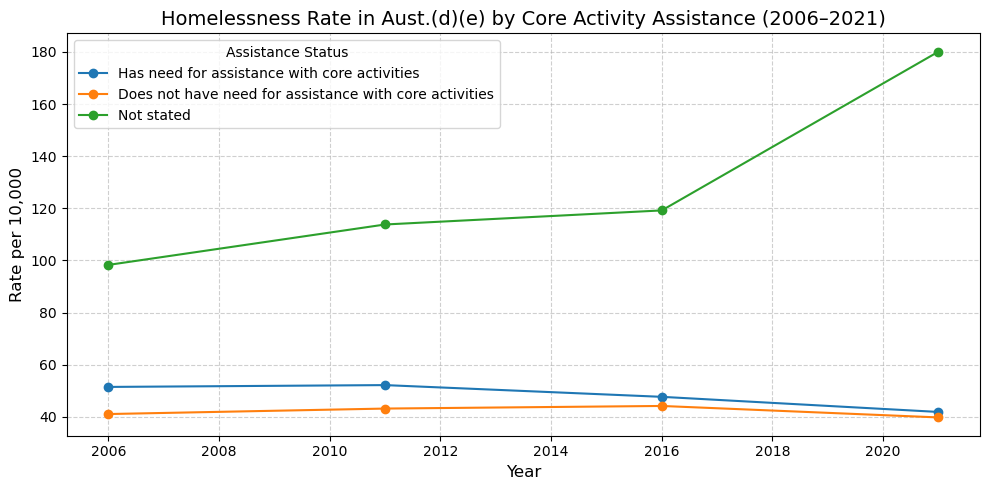

In [28]:
df_core = pd.read_excel("state_wise.xlsx", sheet_name="core_activity")

# Strip whitespace from column names
df_core.columns = df_core.columns.str.strip()

# Define categories and states
categories = df_core["Core activity need for assistance"].unique()
states = ["NSW", "Vic.", "Qld", "SA", "WA", "Tas.", "NT", "ACT", "Aust.(d)(e)"]

# Plot one figure per state
for state in states:
    plt.figure(figsize=(10, 5))
    
    for category in categories:
        df_filtered = df_core[df_core["Core activity need for assistance"] == category]
        plt.plot(df_filtered["Year"], df_filtered[state], marker='o', label=category)

    plt.title(f"Homelessness Rate in {state} by Core Activity Assistance (2006–2021)", fontsize=14)
    plt.xlabel("Year", fontsize=12)
    plt.ylabel("Rate per 10,000", fontsize=12)
    plt.legend(title="Assistance Status")
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

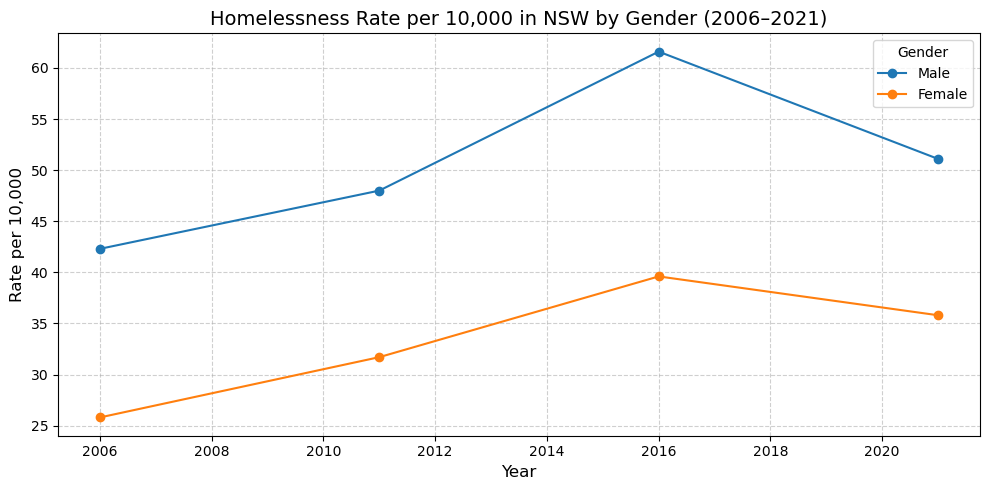

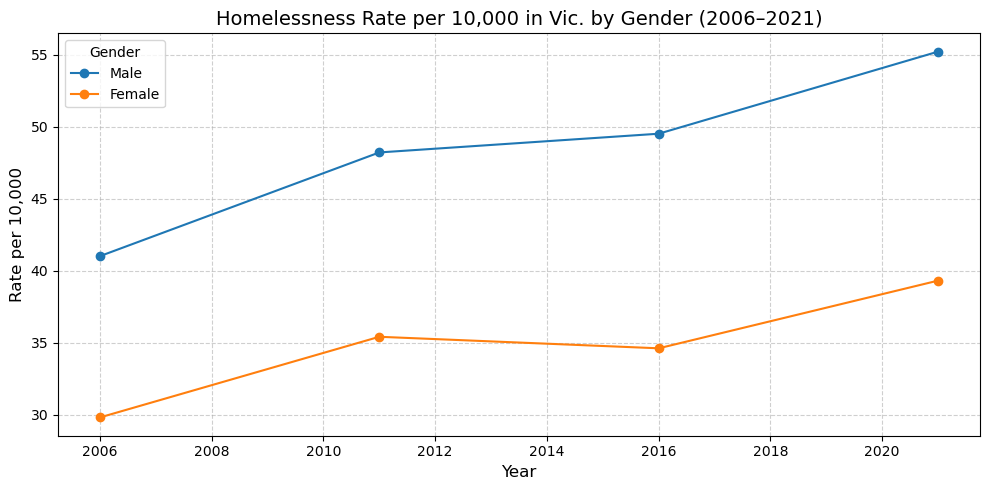

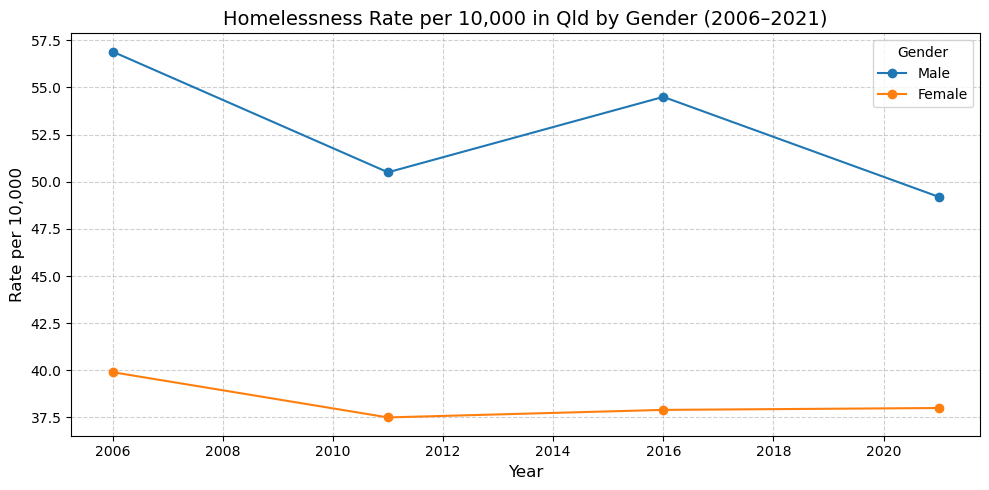

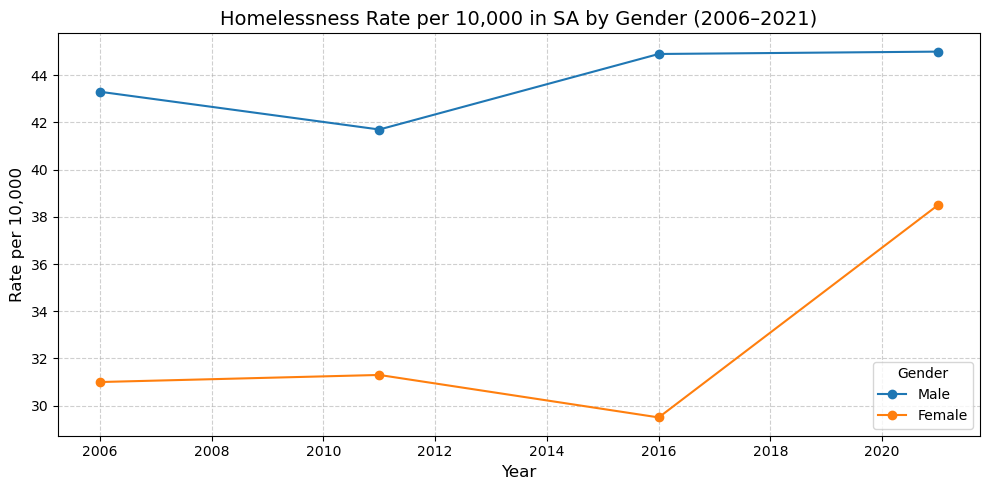

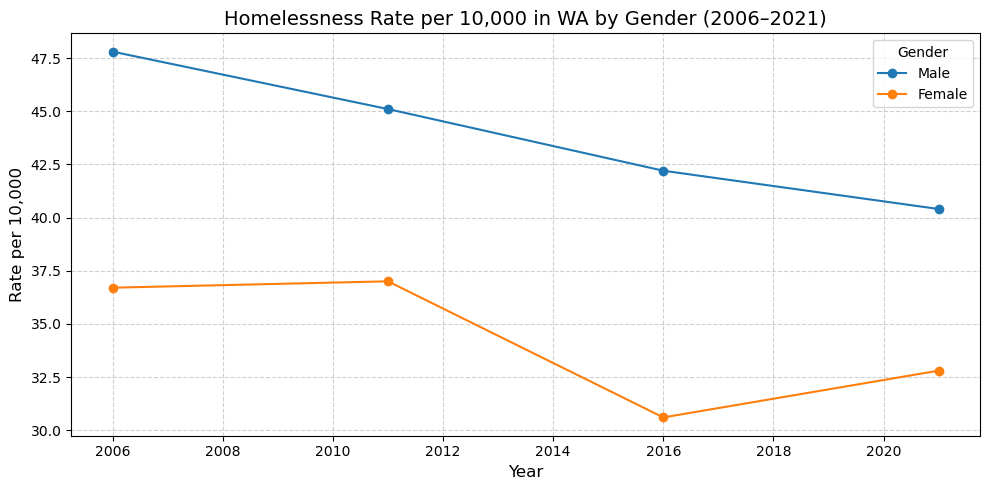

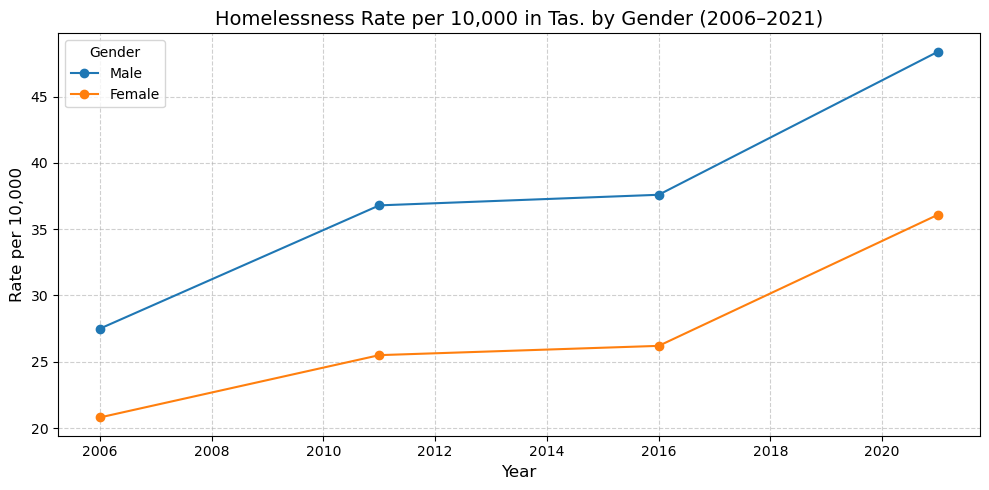

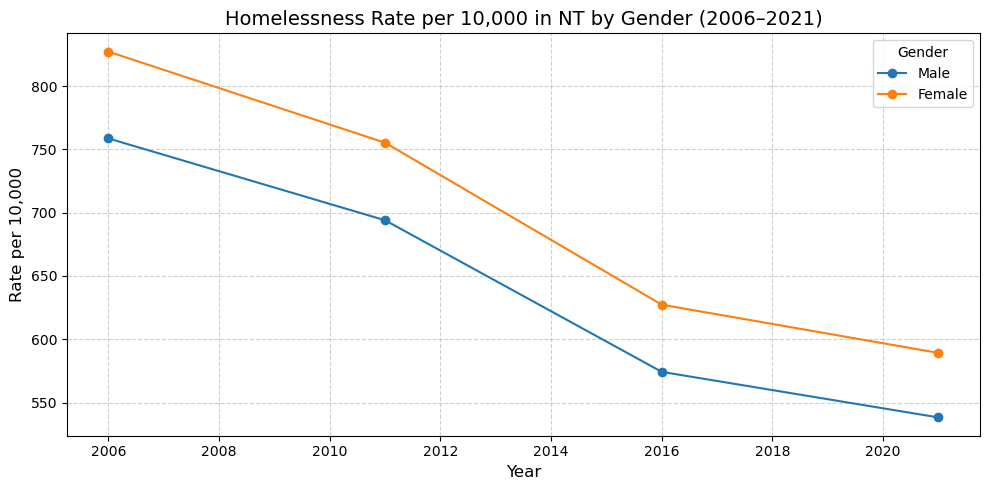

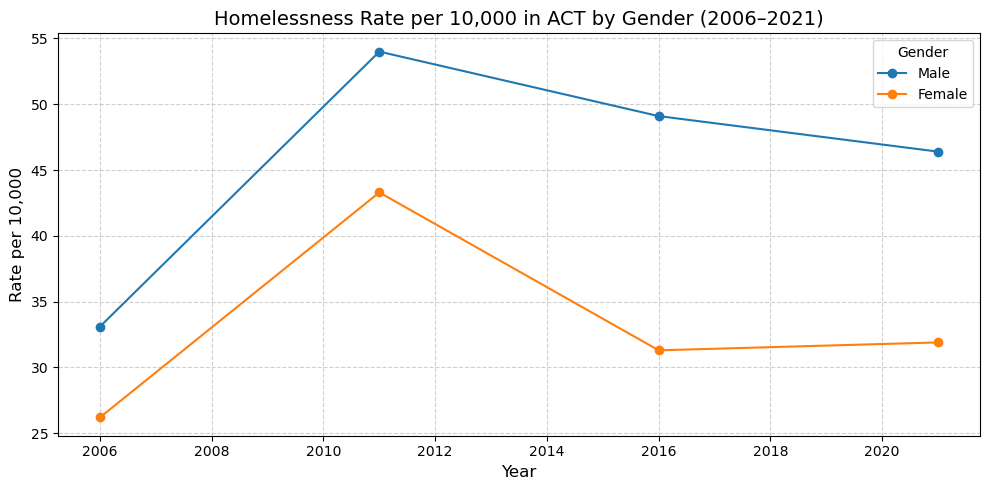

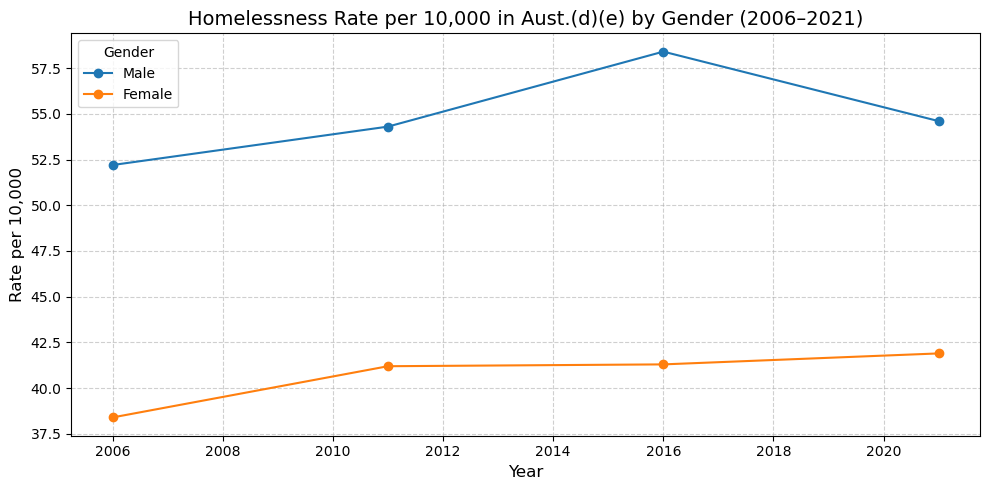

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the gender sheet
df_gender = pd.read_excel("state_wise.xlsx", sheet_name="gender")

# Clean column names
df_gender.columns = df_gender.columns.str.strip()

# Define genders and states
genders = df_gender["gender"].unique()
states = ["NSW", "Vic.", "Qld", "SA", "WA", "Tas.", "NT", "ACT", "Aust.(d)(e)"]

# Loop over each state and plot Male vs Female for that state
for state in states:
    plt.figure(figsize=(10, 5))

    for gender in genders:
        df_filtered = df_gender[df_gender["gender"] == gender]
        plt.plot(df_filtered["Year"], df_filtered[state], marker='o', label=gender)

    plt.title(f"Homelessness Rate per 10,000 in {state} by Gender (2006–2021)", fontsize=14)
    plt.xlabel("Year", fontsize=12)
    plt.ylabel("Rate per 10,000", fontsize=12)
    plt.legend(title="Gender")
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()


## Trend Summary

Slight decline in rates over time for both “has need” and “does not have need” categories.

NT consistently remains an outlier, indicating a need for targeted disability-inclusive housing support.

